## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### (1) Í∞ÄÍ≤© + ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò + Ïû¨Í≥†Îüâ

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
price_data = pd.read_excel('ÎãàÏºà+Í∞ÄÍ≤©_monthly.xls', skiprows=9)
stability_index_data = pd.read_excel('ÎãàÏºà+ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò2024-06-10.xls',skiprows=2)


# ÌïÑÏöî ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
price_data.drop(price_data.columns[[0,6,7,8,9]], axis=1, inplace=True)
stability_index_data.drop(stability_index_data.columns[0], axis=1, inplace=True)


# Í∏∞Ï§ÄÏùº Ïª¨Îüº Îç∞Ïù¥ÌÑ∞ ÎÇ†ÏßúÎ°ú Î≥ÄÍ≤Ω
price_data['Í∏∞Ï§ÄÏùº'] = pd.to_datetime(price_data['Í∏∞Ï§ÄÏùº'])
stability_index_data['Í∏∞Ï§ÄÏùº'] = stability_index_data['Í∏∞Ï§ÄÏùº'].astype(str).apply(lambda x: f"{x[:4]}-{x[4:]}")
stability_index_data['Í∏∞Ï§ÄÏùº'] = pd.to_datetime(stability_index_data['Í∏∞Ï§ÄÏùº'])

# Í∏∞Í∞Ñ ÏÑ§Ï†ï
price_data = price_data[(price_data['Í∏∞Ï§ÄÏùº']>='2017-01-01') & (price_data['Í∏∞Ï§ÄÏùº']<'2024-01-01')]


# # Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df_nickel = pd.merge(price_data, stability_index_data, on='Í∏∞Ï§ÄÏùº')



In [3]:
df_nickel

Í∏∞Ï§ÄÏùº      Í∏∞Ï§ÄÍ∞ÄÍ≤©      Îì±ÎùΩÍ∞Ä  Îì±ÎùΩÎπÑÏú®     Ïû¨Í≥†Îüâ  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  Ï†ÑÏõîÎåÄÎπÑ  Îì±ÎùΩÍ∞Ä  Ï†ÑÏõîÎåÄÎπÑ Îì±ÎùΩÏú®
0  2017-01-01   9984.29 -1028.96 -9.34  374047      NaN       0.00      0.00
1  2017-02-01  10619.50   635.21  6.36  381745    78.24       0.00      0.00
2  2017-03-01  10230.43  -389.07 -3.66  381883    74.56      -3.68     -4.70
3  2017-04-01   9668.61  -561.82 -5.49  375819    77.10       2.54      3.41
4  2017-05-01   9154.29  -514.32 -5.32  380589    80.06       2.96      3.84
..        ...       ...      ...   ...     ...      ...        ...       ...
79 2023-08-01  20497.73  -400.60 -1.92   37074    28.00      -1.55     -5.26
80 2023-09-01  19629.05  -868.68 -4.24   39516    30.97       2.97     10.62
81 2023-10-01  18255.23 -1373.82 -7.00   43572    31.98       1.01      3.26
82 2023-11-01  16979.77 -1275.46 -6.99   43515    41.74       9.76     30.53
83 2023-12-01  16388.68  -591.09 -3.48   51172    47.40       5.66     13.55

[84 rows x 8 columns]

In [4]:
df_nickel.drop(df_nickel.columns[[2,3,6,7]], axis=1, inplace=True)

In [5]:
df_nickel

Í∏∞Ï§ÄÏùº      Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò
0  2017-01-01   9984.29  374047      NaN
1  2017-02-01  10619.50  381745    78.24
2  2017-03-01  10230.43  381883    74.56
3  2017-04-01   9668.61  375819    77.10
4  2017-05-01   9154.29  380589    80.06
..        ...       ...     ...      ...
79 2023-08-01  20497.73   37074    28.00
80 2023-09-01  19629.05   39516    30.97
81 2023-10-01  18255.23   43572    31.98
82 2023-11-01  16979.77   43515    41.74
83 2023-12-01  16388.68   51172    47.40

[84 rows x 4 columns]

In [6]:
# Ïõê/Îã¨Îü¨ ÌôòÏú® Îç∞Ïù¥ÌÑ∞
er_m = pd.read_csv('exchangerate_monthly.csv', encoding='euc-kr')
er_m = er_m[er_m.columns[[0,4]]]

er_m.rename(columns={'Date':'Í∏∞Ï§ÄÏùº', 'Close':'ÌôòÏú®'},inplace=True)
er_m['Í∏∞Ï§ÄÏùº'] = pd.to_datetime(er_m['Í∏∞Ï§ÄÏùº'])

In [7]:
er_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Í∏∞Ï§ÄÏùº     84 non-null     datetime64[ns]
 1   ÌôòÏú®      84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [8]:
er_m

Í∏∞Ï§ÄÏùº           ÌôòÏú®
0  2017-01-01  1169.209961
1  2017-02-01  1133.939941
2  2017-03-01  1117.020020
3  2017-04-01  1135.640015
4  2017-05-01  1123.900024
..        ...          ...
79 2023-08-01  1323.030029
80 2023-09-01  1351.930054
81 2023-10-01  1348.069946
82 2023-11-01  1288.359985
83 2023-12-01  1293.530029

[84 rows x 2 columns]

In [9]:
# Ï≤´ Î≤àÏß∏ NaN => 2017ÎÖÑ 1Ïõî 1Ïùº Í∏∞Ï§ÄÍ∞ÄÍ≤©Í≥º Ïú†ÏÇ¨Ìïú 3Í∞úÏõîÏπò(17ÎÖÑ 2Ïõî-4Ïõî) ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàòÏùò ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥
mean_value = df_nickel.loc[1:3, 'ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò'].mean()
df_nickel.loc[0, 'ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò'] = round(mean_value, 2)

In [10]:
df_nickel

Í∏∞Ï§ÄÏùº      Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò
0  2017-01-01   9984.29  374047    76.63
1  2017-02-01  10619.50  381745    78.24
2  2017-03-01  10230.43  381883    74.56
3  2017-04-01   9668.61  375819    77.10
4  2017-05-01   9154.29  380589    80.06
..        ...       ...     ...      ...
79 2023-08-01  20497.73   37074    28.00
80 2023-09-01  19629.05   39516    30.97
81 2023-10-01  18255.23   43572    31.98
82 2023-11-01  16979.77   43515    41.74
83 2023-12-01  16388.68   51172    47.40

[84 rows x 4 columns]

In [11]:
df_nickel = pd.merge(df_nickel, er_m, how='left', on='Í∏∞Ï§ÄÏùº')

In [12]:
df_nickel

Í∏∞Ï§ÄÏùº      Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò           ÌôòÏú®
0  2017-01-01   9984.29  374047    76.63  1169.209961
1  2017-02-01  10619.50  381745    78.24  1133.939941
2  2017-03-01  10230.43  381883    74.56  1117.020020
3  2017-04-01   9668.61  375819    77.10  1135.640015
4  2017-05-01   9154.29  380589    80.06  1123.900024
..        ...       ...     ...      ...          ...
79 2023-08-01  20497.73   37074    28.00  1323.030029
80 2023-09-01  19629.05   39516    30.97  1351.930054
81 2023-10-01  18255.23   43572    31.98  1348.069946
82 2023-11-01  16979.77   43515    41.74  1288.359985
83 2023-12-01  16388.68   51172    47.40  1293.530029

[84 rows x 5 columns]

### (2) ÏÉùÏÇ∞Îüâ + ÏÜåÎπÑÌòÑÌô©

In [13]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
production_data = pd.read_csv('Í¥ëÏ¢ÖÎ≥ÑÍµ≠Í∞ÄÎ≥ÑÏÉùÏÇ∞Îüâ.csv', encoding='euc-kr')
consumption_data = pd.read_csv('Í¥ëÏ¢ÖÎ≥Ñ ÏÜåÎπÑÌòÑÌô©_20231231.csv', encoding='euc-kr')

# ÌïÑÏöîÏóÜÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
production_data = production_data[(production_data['Í¥ëÏ¢Ö']=='ÎãàÏºà') & (production_data['ÌíàÎ™©']=='refined')]
# ÏÜåÎπÑÌòÑÌô© Îç∞Ïù¥ÌÑ∞Ïóê refinedÎßå ÏûàÏúºÎØÄÎ°ú ÏÉùÏÇ∞Îüâ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú nickel refinedÎßå Í∞ÄÏ†∏Ïò§Í∏∞
consumption_data = consumption_data[consumption_data['Í¥ëÏ¢Ö']=='ÎãàÏºà']


In [14]:
# ÌïÑÏöîÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
production_data.drop(production_data.columns[[0,1,2,3,4]], axis=1, inplace=True)

# ÌñâÏó¥Ï†ÑÌôò
production_data = production_data.T

# Ïó∞ÎèÑÎ≥Ñ Ìï©Í≥Ñ Í≥ÑÏÇ∞Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
production_data= production_data.sum(axis=1).to_frame(name='ÏÉùÏÇ∞Îüâ')

# Ïù∏Îç±Ïä§ Ïù¥Î¶Ñ Ïó∞ÎèÑ(Ïà´Ïûê)Îßå ÎÇòÏò§Í≤å Î≥ÄÍ≤Ω
production_data.index = production_data.index.str.replace(' ÏÉùÏÇ∞Îüâ', '')

In [15]:
# Ïù∏Îç±Ïä§ Ïª¨ÎüºÏúºÎ°ú Î≥ÄÍ≤Ω, 'Ïó∞ÎèÑ'Î°ú Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
production_data.reset_index(inplace=True)
production_data.columns = ['Ïó∞ÎèÑ', 'ÏÉùÏÇ∞Îüâ']

In [16]:
# ÌïÑÏöîÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
consumption_data.drop(consumption_data.columns[[0,1,2,3,4]], axis=1, inplace=True)

# ÌñâÏó¥Ï†ÑÌôò
consumption_data = consumption_data.T

# Ïó∞ÎèÑÎ≥Ñ Ìï©Í≥Ñ Í≥ÑÏÇ∞Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
consumption_data= consumption_data.sum(axis=1).to_frame(name='ÏÜåÎπÑÎüâ')

# Ïù∏Îç±Ïä§ Ïù¥Î¶Ñ Ïó∞ÎèÑ(Ïà´Ïûê)Îßå ÎÇòÏò§Í≤å Î≥ÄÍ≤Ω
consumption_data.index = consumption_data.index.str.replace(' ÏÜåÎπÑÎüâ', '')

In [17]:
# Ïù∏Îç±Ïä§ Ïª¨ÎüºÏúºÎ°ú Î≥ÄÍ≤Ω, 'Ïó∞ÎèÑ'Î°ú Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
consumption_data.reset_index(inplace=True)
consumption_data.columns = ['Ïó∞ÎèÑ', 'ÏÜåÎπÑÎüâ']

In [18]:
consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ïó∞ÎèÑ      13 non-null     object 
 1   ÏÜåÎπÑÎüâ     13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


In [19]:
production_consumption = pd.merge(production_data, consumption_data, on='Ïó∞ÎèÑ')

In [20]:
production_consumption['Ïó∞ÎèÑ'] = production_consumption['Ïó∞ÎèÑ'].astype('int')

In [21]:
# 2017ÎÖÑÎ∂ÄÌÑ∞ 2023ÎÖÑ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÏöî
production_consumption = production_consumption[production_consumption['Ïó∞ÎèÑ']>=2017]
production_consumption.reset_index(drop=True, inplace=True)

In [22]:
production_consumption

Ïó∞ÎèÑ       ÏÉùÏÇ∞Îüâ       ÏÜåÎπÑÎüâ
0  2017  2065.960  2090.518
1  2018  2251.992  2339.103
2  2019  2430.243  2430.139
3  2020  2528.167  2442.837
4  2021  2784.683  2962.181
5  2022  3089.143  3003.505
6  2023  3429.284  3171.547

## Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞ : (1) + (2)

In [23]:
import numpy as np

df_nickel['ÏÉùÏÇ∞Îüâ'] = np.nan
df_nickel['ÏÜåÎπÑÎüâ'] = np.nan

In [24]:
df_nickel

Í∏∞Ï§ÄÏùº      Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò           ÌôòÏú®  ÏÉùÏÇ∞Îüâ  ÏÜåÎπÑÎüâ
0  2017-01-01   9984.29  374047    76.63  1169.209961  NaN  NaN
1  2017-02-01  10619.50  381745    78.24  1133.939941  NaN  NaN
2  2017-03-01  10230.43  381883    74.56  1117.020020  NaN  NaN
3  2017-04-01   9668.61  375819    77.10  1135.640015  NaN  NaN
4  2017-05-01   9154.29  380589    80.06  1123.900024  NaN  NaN
..        ...       ...     ...      ...          ...  ...  ...
79 2023-08-01  20497.73   37074    28.00  1323.030029  NaN  NaN
80 2023-09-01  19629.05   39516    30.97  1351.930054  NaN  NaN
81 2023-10-01  18255.23   43572    31.98  1348.069946  NaN  NaN
82 2023-11-01  16979.77   43515    41.74  1288.359985  NaN  NaN
83 2023-12-01  16388.68   51172    47.40  1293.530029  NaN  NaN

[84 rows x 7 columns]

In [25]:
# ÏÉùÏÇ∞ÎüâÍ≥º ÏÜåÎπÑÎüâÏùÑ Ïó∞ÎèÑÎ≥ÑÎ°ú Ïõî Îã®ÏúÑÎ°ú ÎÇòÎàÑÏñ¥ÏÑú Ìï†Îãπ

for i, r in df_nickel.iterrows():
    year = r['Í∏∞Ï§ÄÏùº'].year
    
    for idx, row in production_consumption.iterrows():
        if row['Ïó∞ÎèÑ']==year:
            df_nickel.iloc[i, 5] = round(row['ÏÉùÏÇ∞Îüâ']/12, 2)
            df_nickel.iloc[i, 6] = round(row['ÏÜåÎπÑÎüâ']/12, 2)

In [26]:
df_nickel

Í∏∞Ï§ÄÏùº      Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò           ÌôòÏú®     ÏÉùÏÇ∞Îüâ     ÏÜåÎπÑÎüâ
0  2017-01-01   9984.29  374047    76.63  1169.209961  172.16  174.21
1  2017-02-01  10619.50  381745    78.24  1133.939941  172.16  174.21
2  2017-03-01  10230.43  381883    74.56  1117.020020  172.16  174.21
3  2017-04-01   9668.61  375819    77.10  1135.640015  172.16  174.21
4  2017-05-01   9154.29  380589    80.06  1123.900024  172.16  174.21
..        ...       ...     ...      ...          ...     ...     ...
79 2023-08-01  20497.73   37074    28.00  1323.030029  285.77  264.30
80 2023-09-01  19629.05   39516    30.97  1351.930054  285.77  264.30
81 2023-10-01  18255.23   43572    31.98  1348.069946  285.77  264.30
82 2023-11-01  16979.77   43515    41.74  1288.359985  285.77  264.30
83 2023-12-01  16388.68   51172    47.40  1293.530029  285.77  264.30

[84 rows x 7 columns]

In [27]:
df_nickel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Í∏∞Ï§ÄÏùº      84 non-null     datetime64[ns]
 1   Í∏∞Ï§ÄÍ∞ÄÍ≤©     84 non-null     float64       
 2   Ïû¨Í≥†Îüâ      84 non-null     int64         
 3   ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  84 non-null     float64       
 4   ÌôòÏú®       84 non-null     float64       
 5   ÏÉùÏÇ∞Îüâ      84 non-null     float64       
 6   ÏÜåÎπÑÎüâ      84 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 4.7 KB


In [28]:
df_nickel.describe()

Í∏∞Ï§ÄÏùº          Í∏∞Ï§ÄÍ∞ÄÍ≤©            Ïû¨Í≥†Îüâ    ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  \
count                             84     84.000000      84.000000  84.000000   
mean   2020-06-16 01:08:34.285714176  16689.513571  193718.738095  39.705476   
min              2017-01-01 00:00:00   8930.680000   37074.000000   6.240000   
25%              2018-09-23 12:00:00  12477.230000   72929.250000  16.585000   
50%              2020-06-16 00:00:00  15209.440000  206399.000000  38.860000   
75%              2022-03-08 18:00:00  19990.800000  255798.500000  60.375000   
max              2023-12-01 00:00:00  33298.420000  385273.000000  82.860000   
std                              NaN   5534.406269  114615.840014  24.056437   

                ÌôòÏú®         ÏÉùÏÇ∞Îüâ         ÏÜåÎπÑÎüâ  
count    84.000000   84.000000   84.000000  
mean   1173.638280  221.184286  219.522857  
min       0.115380  172.160000  174.210000  
25%    1119.762543  187.670000  194.930000  
50%    1168.534973  210.680000  203.570000  
75%    1230.577515  257.430000  250.290000  
max    1430.170044  285.770000  264.300000  
std     155.689197   37.233159   31.585517

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.dates as mdates

plt.rc('font', family='Malgun Gothic')
%matplotlib inline

matplotlib.rcParams['axes.unicode_minus']=False

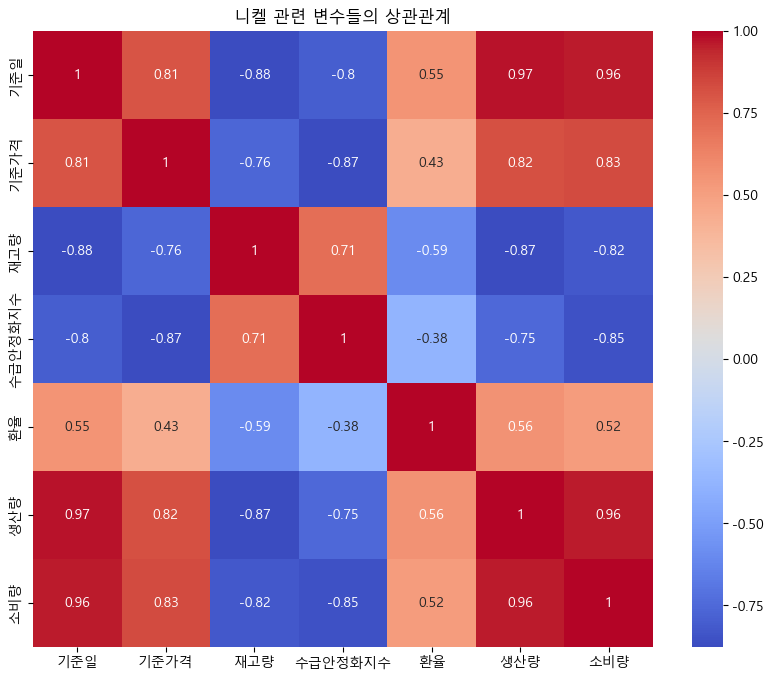

In [30]:

plt.figure(figsize=(10, 8))
sns.heatmap(df_nickel.corr(), annot=True, cmap='coolwarm')
plt.title('ÎãàÏºà Í¥ÄÎ†® Î≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.show()

ÏÜåÎπÑÎüâÍ≥º ÏÉùÏÇ∞ÎüâÏù¥ ÌÅ¥ÏàòÎ°ù, ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàòÏôÄ LME(London Metal Exchange) Ïû¨Í≥†ÎüâÏù¥ ÎÇÆÏùÑÏàòÎ°ù Í∞ÄÍ≤©Ïù¥ ÎÜíÏïÑÏßê

Text(0, 0.5, 'price')

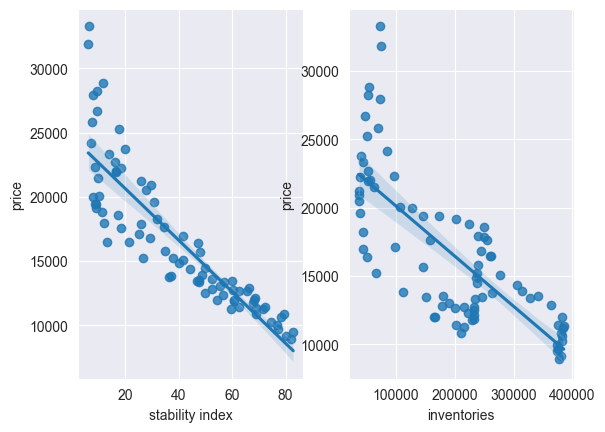

In [31]:
# ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàòÍ≥º Ïû¨Í≥†ÎüâÍ≥º Í∞ÄÍ≤©Ïùò Í¥ÄÍ≥Ñ Í¥ÄÏ∞∞

sns.set_style('darkgrid')
sns.set_style(rc={'figure.figsize':(12,6)})

fig, ax = plt.subplots(ncols=2)
sns.regplot(x='ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò', y='Í∏∞Ï§ÄÍ∞ÄÍ≤©', data=df_nickel, ax=ax[0])
ax[0].set_xlabel('stability index')
ax[0].set_ylabel('price')

sns.regplot(x='Ïû¨Í≥†Îüâ', y='Í∏∞Ï§ÄÍ∞ÄÍ≤©', data=df_nickel, ax=ax[1])
ax[1].set_xlabel('inventories')
ax[1].set_ylabel('price')

---

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

ÏïûÏóêÏÑúÎäî ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©ÌñàÏúºÎÇò prophet, arima ÏòàÏ∏°ÏóêÎäî ÏùºÎ≥ÑÎç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©

In [32]:
# Í∞ÄÍ≤©Í≥º Ïû¨Í≥†Îüâ ÏùºÎ≥Ñ Îç∞Ïù¥ÌÑ∞
price_d = pd.read_excel('ÎãàÏºà+Í∞ÄÍ≤©_daily.xls', skiprows=9)
price_d.drop(price_d.columns[[0,6,7,8,9]], axis=1, inplace=True)
price_d['Í∏∞Ï§ÄÏùº'] = pd.to_datetime(price_d['Í∏∞Ï§ÄÏùº'])
price_d = price_d[(price_d['Í∏∞Ï§ÄÏùº']>='2017-01-01') & (price_d['Í∏∞Ï§ÄÏùº']<='2023-12-31')]
price_d = price_d[price_d.columns[[0,1,4]]]

In [33]:
price_d 

Í∏∞Ï§ÄÏùº   Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ
650  2017-01-03  10205  372066
651  2017-01-04   9975  371724
652  2017-01-05  10230  370920
653  2017-01-06  10185  370920
654  2017-01-09  10245  372012
...         ...    ...     ...
2412 2023-12-21  16670   53676
2413 2023-12-22  16360   56058
2414 2023-12-27  16355   57804
2415 2023-12-28  16405   62022
2416 2023-12-29  16300   64056

[1767 rows x 3 columns]

In [34]:
# Ïõê/Îã¨Îü¨ ÌôòÏú® Îç∞Ïù¥ÌÑ∞
er = pd.read_csv('exchangerate.csv', encoding='euc-kr')
er = er[er.columns[[0,4]]]

er.rename(columns={'Date':'Í∏∞Ï§ÄÏùº', 'Close':'ÌôòÏú®'},inplace=True)
er['Í∏∞Ï§ÄÏùº'] = pd.to_datetime(er['Í∏∞Ï§ÄÏùº'])
er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Í∏∞Ï§ÄÏùº     1825 non-null   datetime64[ns]
 1   ÌôòÏú®      1822 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.6 KB


In [35]:
# Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
merged_df = pd.merge(price_d, er, how='left', on='Í∏∞Ï§ÄÏùº')

In [36]:
# interpolateÏúºÎ°ú nanÍ∞í Ï±ÑÏö∞Í∏∞
merged_df['ÌôòÏú®'] = merged_df['ÌôòÏú®'].interpolate(method='linear')

In [37]:
merged_df

Í∏∞Ï§ÄÏùº   Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ           ÌôòÏú®
0    2017-01-03  10205  372066  1202.930054
1    2017-01-04   9975  371724  1206.010010
2    2017-01-05  10230  370920  1194.479980
3    2017-01-06  10185  370920  1180.630005
4    2017-01-09  10245  372012  1201.099976
...         ...    ...     ...          ...
1762 2023-12-21  16670   53676  1296.979980
1763 2023-12-22  16360   56058  1291.709961
1764 2023-12-27  16355   57804  1293.920044
1765 2023-12-28  16405   62022  1294.760010
1766 2023-12-29  16300   64056  1277.839966

[1767 rows x 4 columns]

In [38]:
# ÏÉùÏÇ∞Îüâ ÏÜåÎπÑÎüâ Îç∞Ïù¥ÌÑ∞ 
# Ïó∞ÎèÑÎ•º ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò (Í∞Å Ïó∞ÎèÑÏùò 12Ïõî 31ÏùºÎ°ú ÏÑ§Ï†ï)
production_consumption['Ïó∞ÎèÑ'] = pd.to_datetime(production_consumption['Ïó∞ÎèÑ'], format='%Y') + pd.offsets.DateOffset(months=11, days=30)


In [39]:
production_consumption.rename(columns={'Ïó∞ÎèÑ':'Í∏∞Ï§ÄÏùº'}, inplace=True)

In [40]:
production_consumption

Í∏∞Ï§ÄÏùº       ÏÉùÏÇ∞Îüâ       ÏÜåÎπÑÎüâ
0 2017-12-31  2065.960  2090.518
1 2018-12-31  2251.992  2339.103
2 2019-12-31  2430.243  2430.139
3 2020-12-31  2528.167  2442.837
4 2021-12-31  2784.683  2962.181
5 2022-12-31  3089.143  3003.505
6 2023-12-31  3429.284  3171.547

In [41]:
df_tmp = merged_df.copy()

In [42]:
import numpy as np
from scipy import stats
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
# Z-scoreÎ•º ÏÇ¨Ïö©Ìïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
z_scores = np.abs(stats.zscore(df_tmp['Í∏∞Ï§ÄÍ∞ÄÍ≤©']))
threshold = 3 # ÏûÑÍ≥ÑÍ∞í
z_outliers = (z_scores > threshold)

# Ïù¥ÏÉÅÏπò ÎÇ†Ïßú Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
date_list = []
for i, r in df_tmp[z_outliers].iterrows():
    d = r[0]
    date_list.append(d)

# Ìï¥Îãπ ÎÇ†Ïßú Í∞ÄÍ≤© nanÏúºÎ°ú ÎåÄÏ≤¥
for i, r in df_tmp.iterrows():
    if r['Í∏∞Ï§ÄÏùº'] in date_list:
        df_tmp.at[i, 'Í∏∞Ï§ÄÍ∞ÄÍ≤©'] = np.nan

# Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ
df_tmp['Í∏∞Ï§ÄÍ∞ÄÍ≤©'] = df_tmp['Í∏∞Ï§ÄÍ∞ÄÍ≤©'].interpolate(method='linear').round(2)

In [43]:
date_list

[Timestamp('2022-03-07 00:00:00'),
 Timestamp('2022-03-23 00:00:00'),
 Timestamp('2022-03-24 00:00:00'),
 Timestamp('2022-03-25 00:00:00'),
 Timestamp('2022-03-28 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-05 00:00:00'),
 Timestamp('2022-04-06 00:00:00'),
 Timestamp('2022-04-07 00:00:00'),
 Timestamp('2022-04-08 00:00:00'),
 Timestamp('2022-04-19 00:00:00'),
 Timestamp('2022-04-20 00:00:00'),
 Timestamp('2022-04-21 00:00:00'),
 Timestamp('2022-04-22 00:00:00'),
 Timestamp('2022-04-27 00:00:00'),
 Timestamp('2022-04-28 00:00:00')]

In [44]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Í∏∞Ï§ÄÏùº     1767 non-null   datetime64[ns]
 1   Í∏∞Ï§ÄÍ∞ÄÍ≤©    1767 non-null   float64       
 2   Ïû¨Í≥†Îüâ     1767 non-null   int64         
 3   ÌôòÏú®      1767 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 55.3 KB


In [45]:
df_tmp[df_tmp['Í∏∞Ï§ÄÏùº'].isin(date_list)]

Í∏∞Ï§ÄÏùº      Í∏∞Ï§ÄÍ∞ÄÍ≤©    Ïû¨Í≥†Îüâ           ÌôòÏú®
1309 2022-03-07  30300.00  76830  1216.709961
1321 2022-03-23  31260.00  73242  1214.949951
1322 2022-03-24  31720.00  73074  1218.010010
1323 2022-03-25  32180.00  72924  1217.550049
1324 2022-03-28  32640.00  72816  1224.380005
1327 2022-03-31  32775.00  72570  1210.439941
1329 2022-04-04  32820.83  73362  1218.780029
1330 2022-04-05  32841.67  72924  1213.900024
1331 2022-04-06  32862.50  73902  1218.750000
1332 2022-04-07  32883.33  74190  1217.599976
1333 2022-04-08  32904.17  73692  1222.660034
1338 2022-04-19  33130.00  72534  1235.349976
1339 2022-04-20  33010.00  72894  1239.599976
1340 2022-04-21  32890.00  73068  1234.089966
1341 2022-04-22  32770.00  72678  1242.489990
1344 2022-04-27  32693.33  72564  1260.709961
1345 2022-04-28  32561.67  72642  1266.280029

## PROPHET

In [226]:
# prophet ÏòàÏ∏° Î™®Îç∏ Ìï®Ïàò

from prophet import Prophet

def forecast_with_prophet(data, column, periods, freq):
    df = data[['Í∏∞Ï§ÄÏùº', column]].rename(columns={'Í∏∞Ï§ÄÏùº': 'ds', column: 'y'})
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=periods, freq=freq)
    forecast = model.predict(future)
            
    # ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    fig1 = model.plot(forecast)
    plt.show()

    # Íµ¨ÏÑ± ÏöîÏÜå ÏãúÍ∞ÅÌôî
    fig2 = model.plot_components(forecast)
    plt.show()
    return forecast[['ds', 'yhat']].tail(periods)



17:34:03 - cmdstanpy - INFO - Chain [1] start processing
17:34:03 - cmdstanpy - INFO - Chain [1] done processing


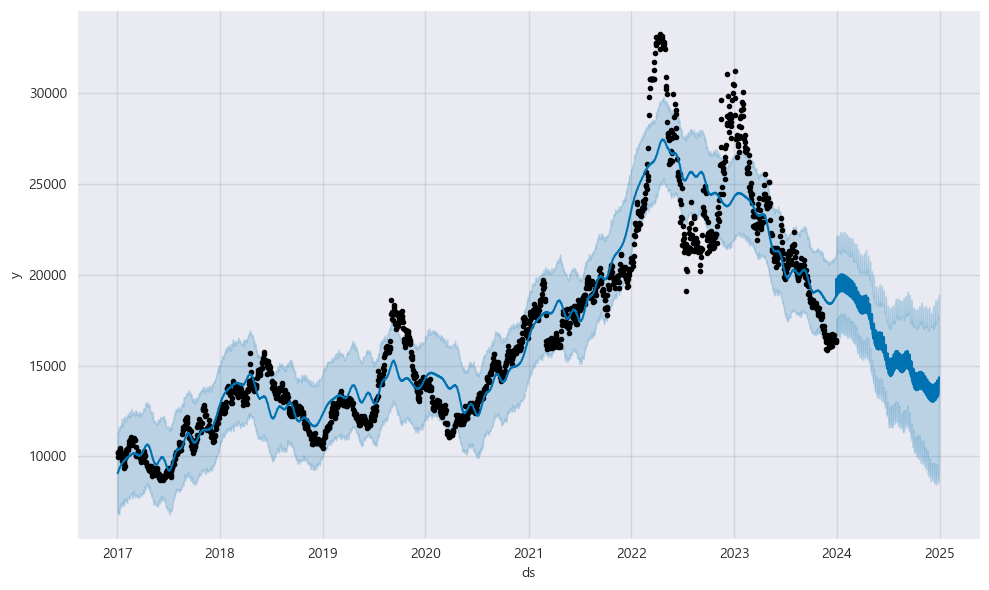

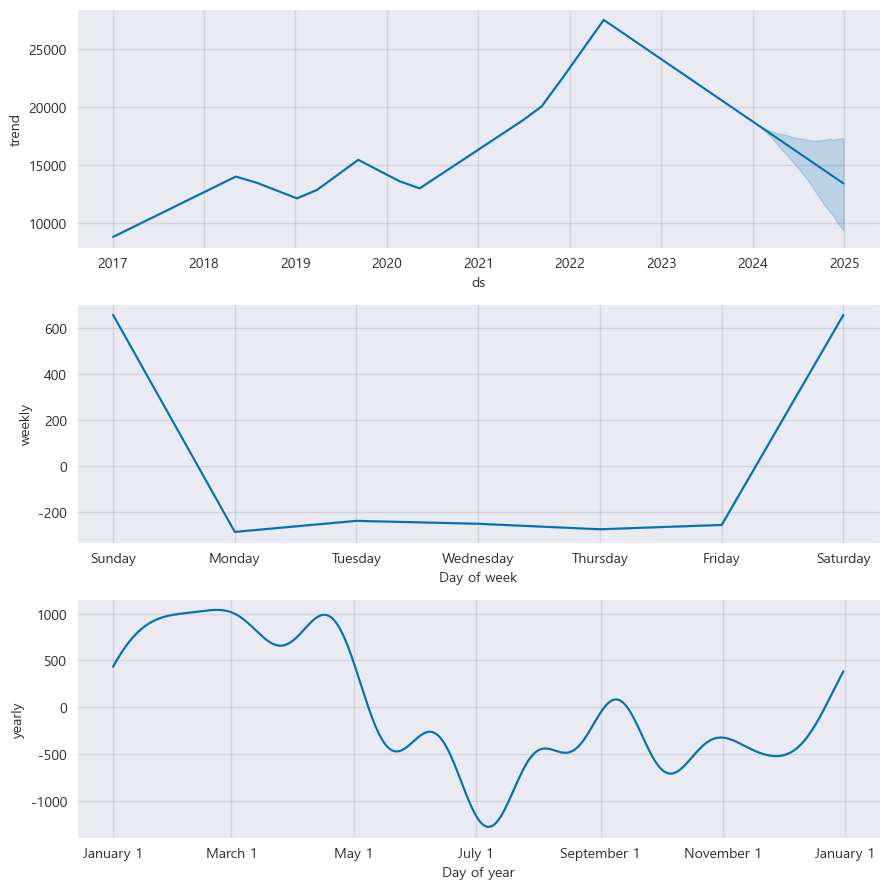

17:34:04 - cmdstanpy - INFO - Chain [1] start processing
17:34:05 - cmdstanpy - INFO - Chain [1] done processing


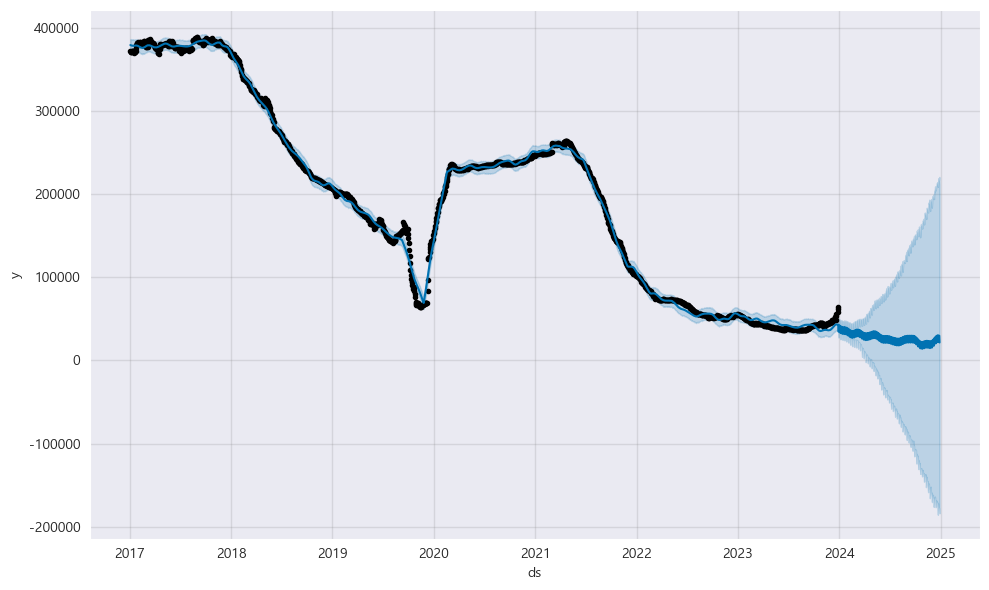

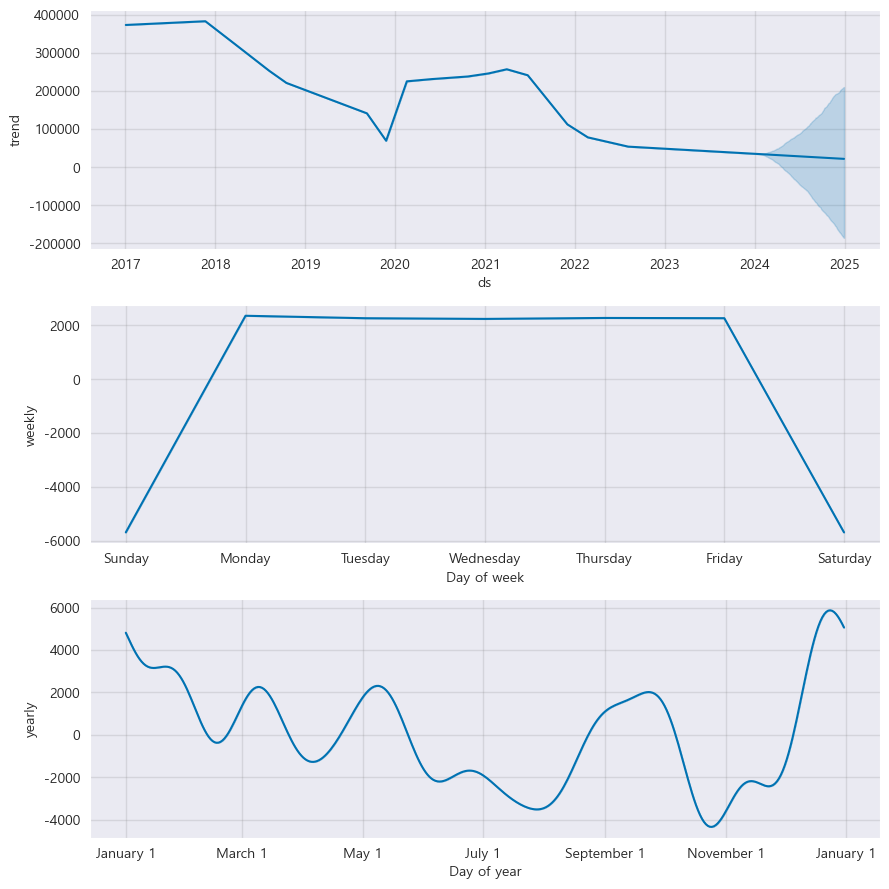

17:34:07 - cmdstanpy - INFO - Chain [1] start processing
17:34:14 - cmdstanpy - INFO - Chain [1] done processing


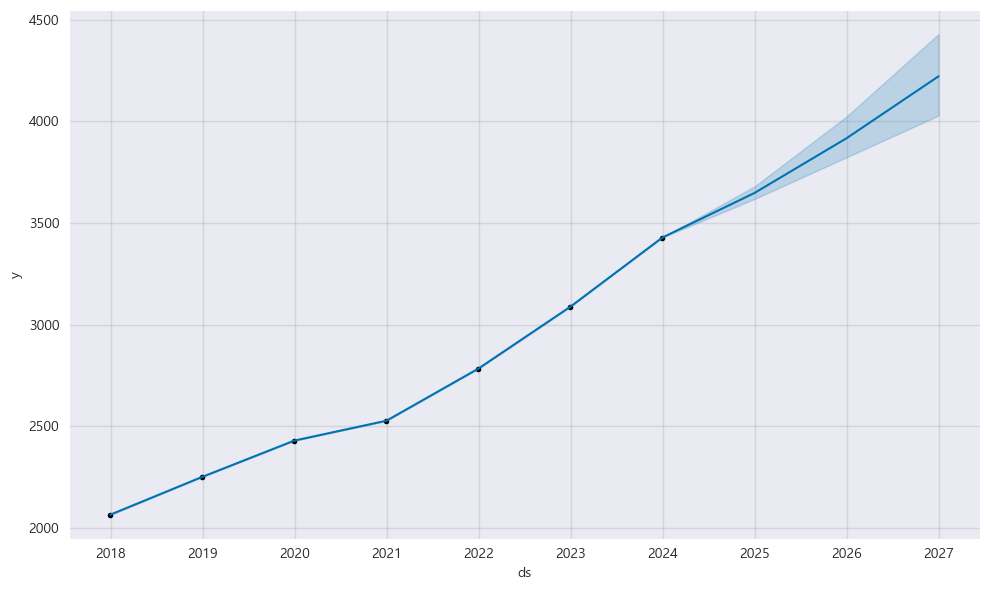

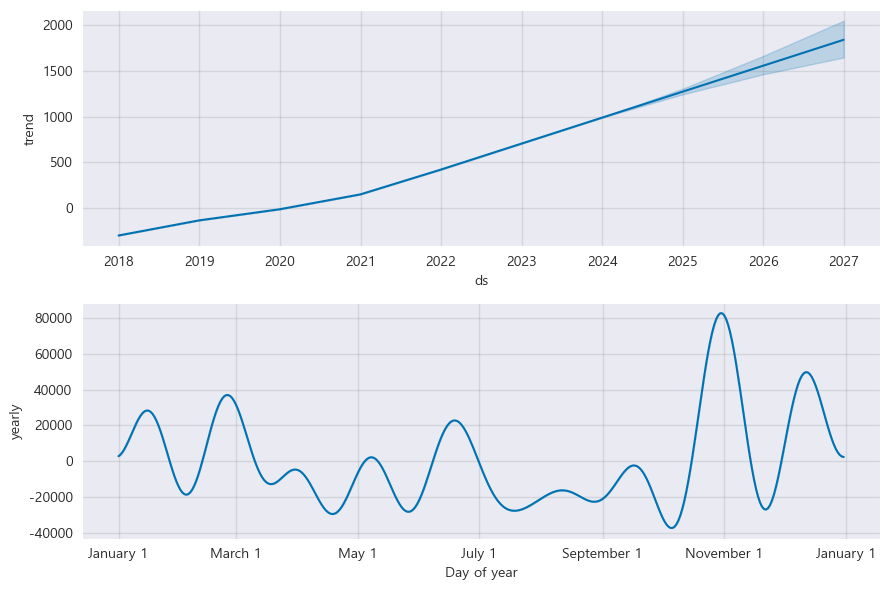

17:34:15 - cmdstanpy - INFO - Chain [1] start processing
17:34:15 - cmdstanpy - INFO - Chain [1] done processing


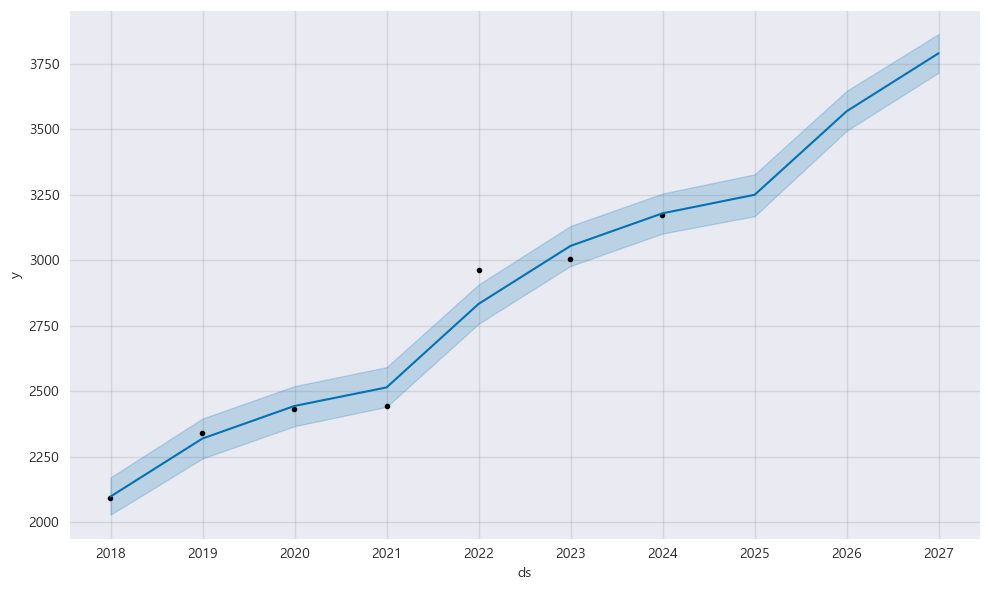

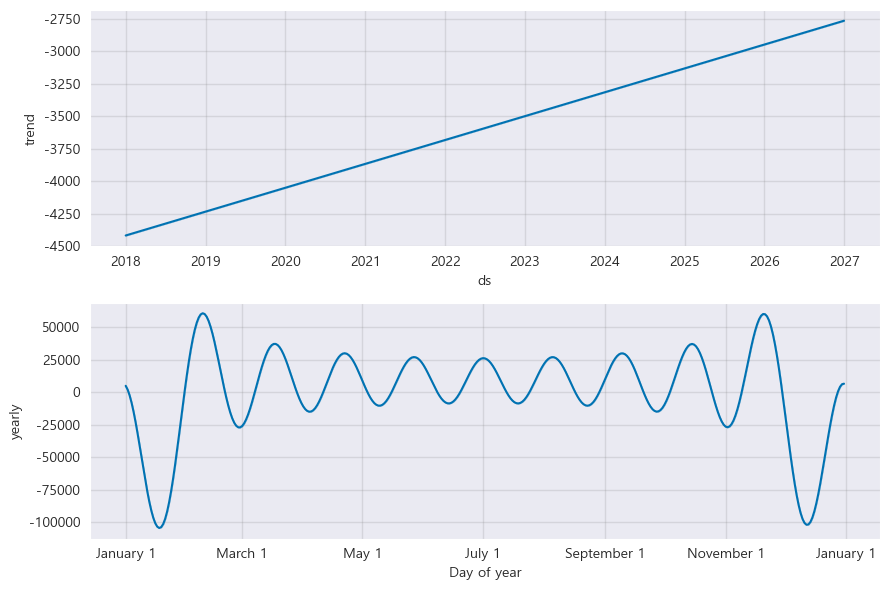

17:34:16 - cmdstanpy - INFO - Chain [1] start processing
17:34:17 - cmdstanpy - INFO - Chain [1] done processing


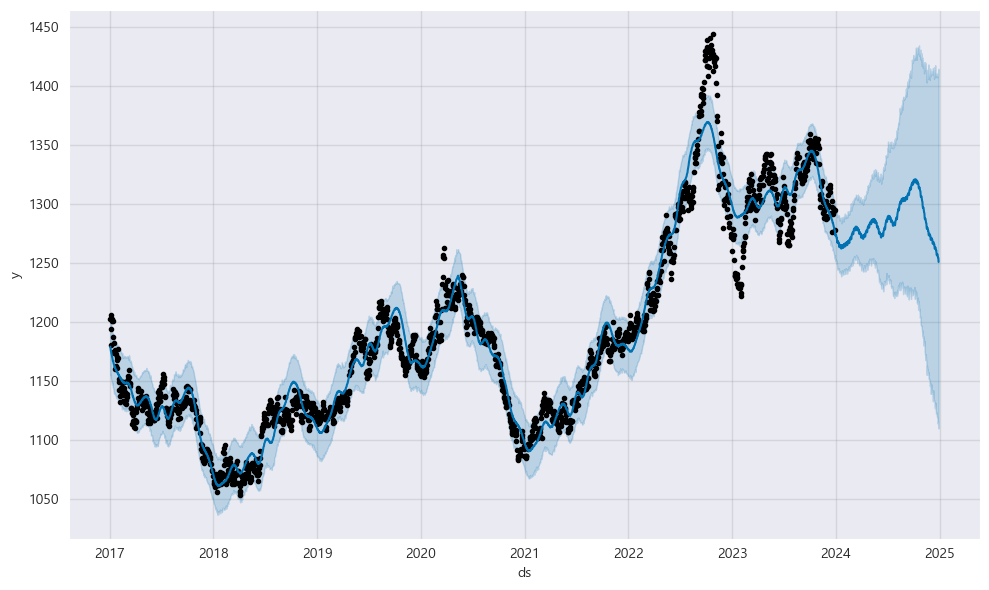

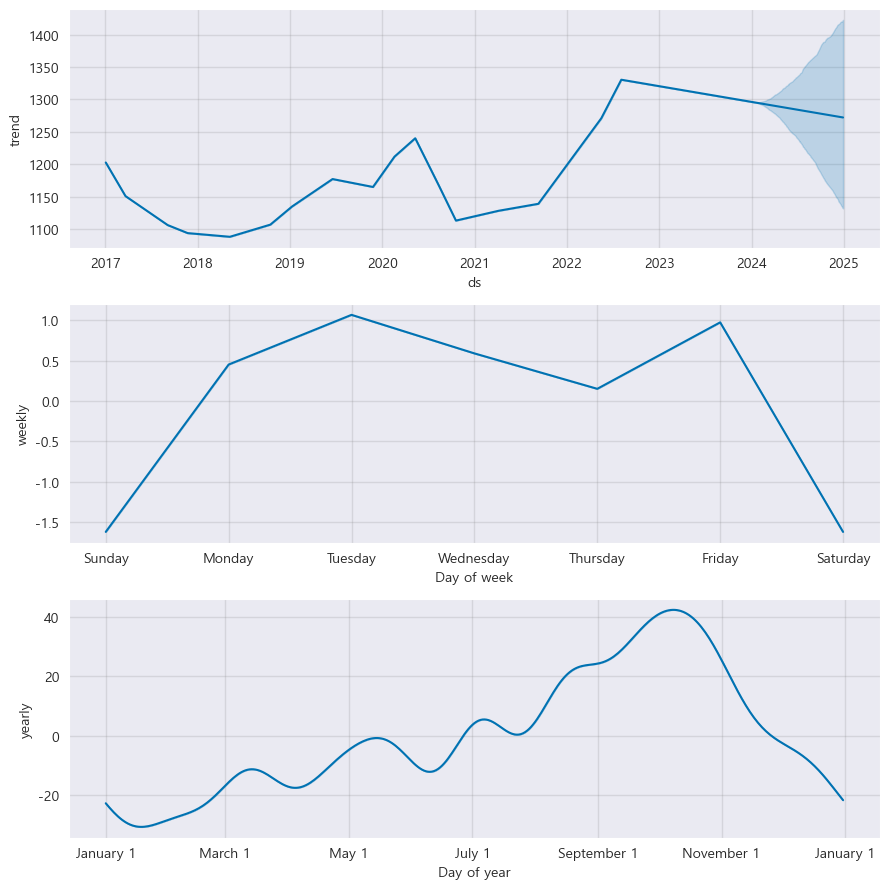

In [227]:
# ÏùºÎ≥Ñ ÏòàÏ∏°, Ïó∞ÎèÑÎ≥Ñ ÏòàÏ∏°ÏúºÎ°ú ÎÇòÎà†ÏÑú ÏòàÏ∏°
prophet_forecasts_d = pd.DataFrame()
prophet_forecasts_y = pd.DataFrame()
for column in ['Í∏∞Ï§ÄÍ∞ÄÍ≤©', 'Ïû¨Í≥†Îüâ', 'ÏÉùÏÇ∞Îüâ', 'ÏÜåÎπÑÎüâ', 'ÌôòÏú®']:
    if column in ['Í∏∞Ï§ÄÍ∞ÄÍ≤©', 'Ïû¨Í≥†Îüâ', 'ÌôòÏú®']: # 3ÎÖÑÏπò ÏòàÏ∏°
        forecast_d = forecast_with_prophet(df_tmp, column, 365, 'D')
        prophet_forecasts_d['ds'] = forecast_d[['ds']]
        prophet_forecasts_d[column] = forecast_d[['yhat']]
        

    if column in ['ÏÉùÏÇ∞Îüâ', 'ÏÜåÎπÑÎüâ']: # 3ÎÖÑÏπò ÏòàÏ∏°
        forecast_y = forecast_with_prophet(production_consumption, column, 3, 'Y')
        prophet_forecasts_y['ds'] = forecast_y[['ds']]
        prophet_forecasts_y[column] = forecast_y[['yhat']]


In [48]:
prophet_forecasts_d

ds          Í∏∞Ï§ÄÍ∞ÄÍ≤©           Ïû¨Í≥†Îüâ           ÌôòÏú®
1767 2023-12-30  19766.710989  34760.689296  1274.062553
1768 2023-12-31  19792.730179  34545.462898  1273.128813
1769 2024-01-01  18873.581438  42352.271907  1274.280779
1770 2024-01-02  18945.868807  42025.964637  1273.993306
1771 2024-01-03  18955.992419  41762.828598  1272.635558
...         ...           ...           ...          ...
2127 2024-12-24  13348.878120  30066.117189  1257.434703
2128 2024-12-25  13363.867843  29970.838824  1256.032993
2129 2024-12-26  13367.936857  29899.533876  1254.658793
2130 2024-12-27  13414.516547  29751.064269  1254.539940
2131 2024-12-28  14355.898325  21638.109657  1250.999674

[365 rows x 4 columns]

In [49]:
prophet_forecasts_y

ds          ÏÉùÏÇ∞Îüâ          ÏÜåÎπÑÎüâ
7 2024-12-31  3648.794281  3249.542706
8 2025-12-31  3917.901521  3568.176923
9 2026-12-31  4222.362699  3789.673982

In [50]:
prophet_forecasts_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 1767 to 2131
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      365 non-null    datetime64[ns]
 1   Í∏∞Ï§ÄÍ∞ÄÍ≤©    365 non-null    float64       
 2   Ïû¨Í≥†Îüâ     365 non-null    float64       
 3   ÌôòÏú®      365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [ ]:
    
# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig1 = model.plot(forecast)
plt.show()

# Íµ¨ÏÑ± ÏöîÏÜå ÏãúÍ∞ÅÌôî
fig2 = model.plot_components(forecast)
plt.show()

In [51]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.dates as mdates

plt.rc('font', family='Malgun Gothic')
%matplotlib inline

matplotlib.rcParams['axes.unicode_minus']=False

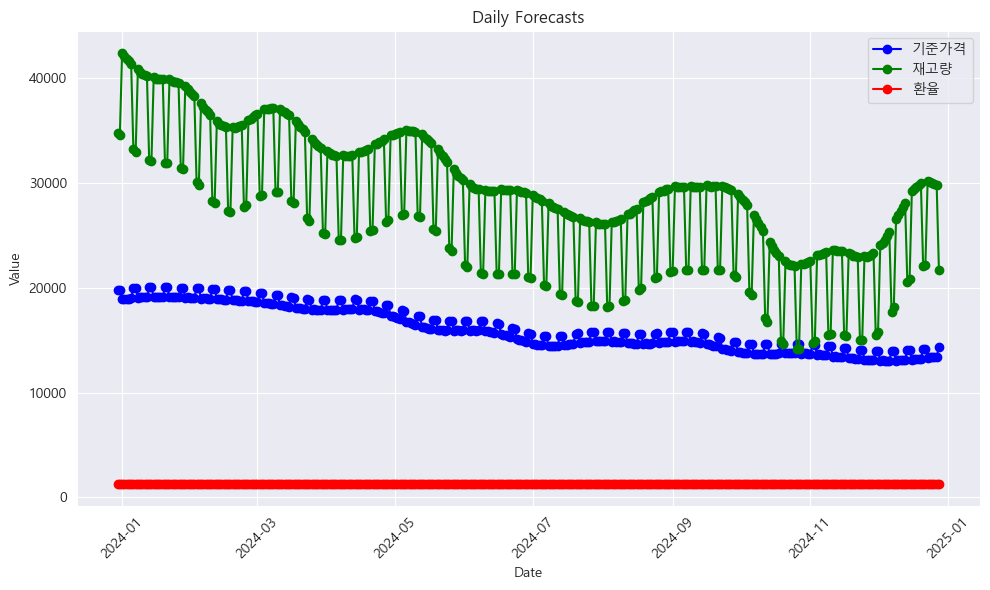

In [225]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))

# Í∏∞Ï§ÄÍ∞ÄÍ≤© ÏòàÏ∏° Í∑∏ÎûòÌîÑ
plt.plot(prophet_forecasts_d['ds'], prophet_forecasts_d['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], marker='o', linestyle='-', color='b', label='Í∏∞Ï§ÄÍ∞ÄÍ≤©')

# Ïû¨Í≥†Îüâ ÏòàÏ∏° Í∑∏ÎûòÌîÑ
plt.plot(prophet_forecasts_d['ds'], prophet_forecasts_d['Ïû¨Í≥†Îüâ'], marker='o', linestyle='-', color='g', label='Ïû¨Í≥†Îüâ')


# ÌôòÏú® ÏòàÏ∏° Í∑∏ÎûòÌîÑ
plt.plot(prophet_forecasts_d['ds'], prophet_forecasts_d['ÌôòÏú®'], marker='o', linestyle='-', color='r', label='ÌôòÏú®')

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Daily Forecasts')
plt.xlabel('Date')
plt.ylabel('Value')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
plt.legend()

# xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ
plt.xticks(rotation=45)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.tight_layout()
plt.show()

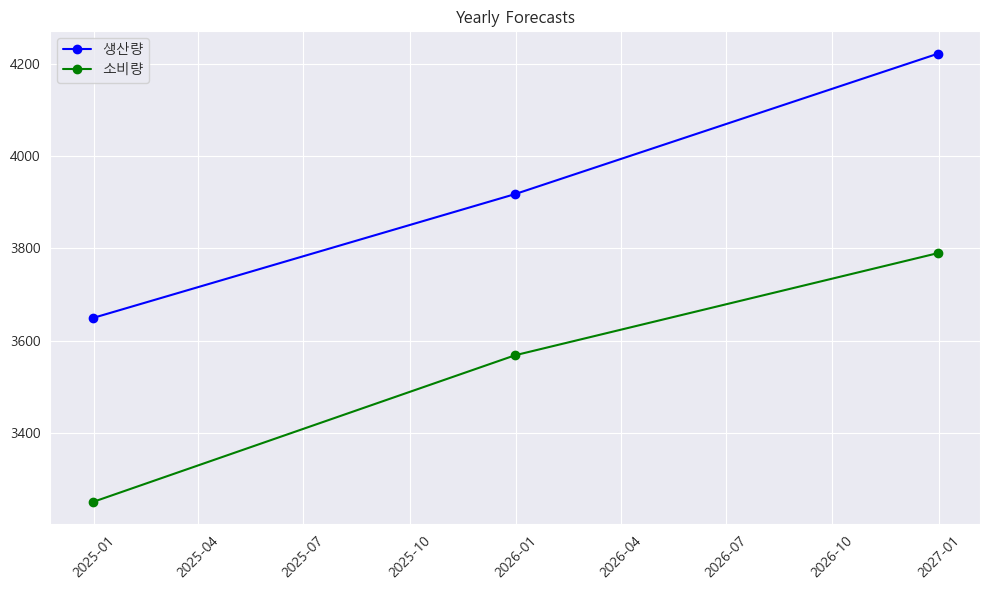

In [220]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))

# Í∏∞Ï§ÄÍ∞ÄÍ≤© ÏòàÏ∏° Í∑∏ÎûòÌîÑ
plt.plot(prophet_forecasts_y['ds'], prophet_forecasts_y['ÏÉùÏÇ∞Îüâ'], marker='o', linestyle='-', color='b', label='ÏÉùÏÇ∞Îüâ')

# Ïû¨Í≥†Îüâ ÏòàÏ∏° Í∑∏ÎûòÌîÑ
plt.plot(prophet_forecasts_y['ds'], prophet_forecasts_y['ÏÜåÎπÑÎüâ'], marker='o', linestyle='-', color='g', label='ÏÜåÎπÑÎüâ')



# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Yearly Forecasts')
plt.xlabel('')
plt.ylabel('')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
plt.legend()

# xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ
plt.xticks(rotation=45)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.tight_layout()
plt.show()

### ARIMA

In [54]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [55]:

# Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï Ìï®Ïàò
def check_stationarity(timeseries):
    # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # rolling statistics plot
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

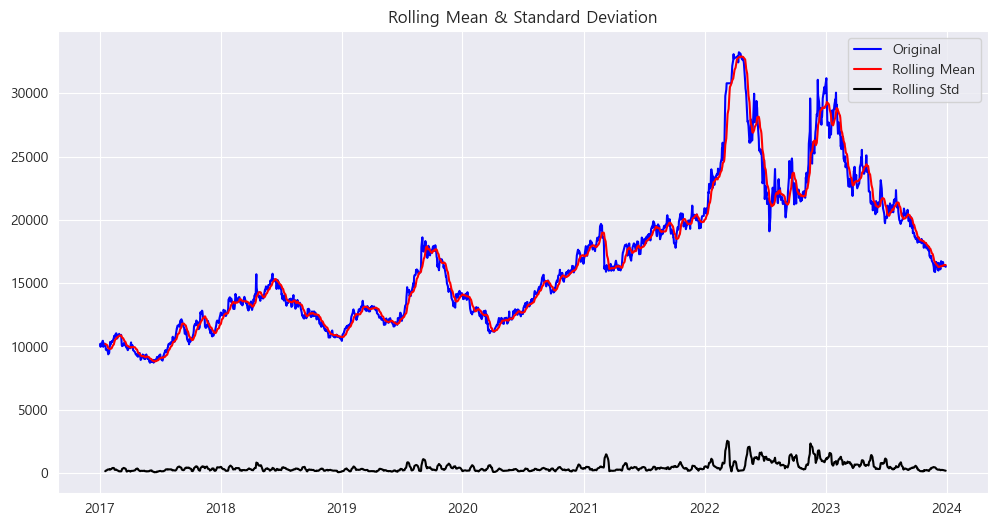

Results of Dickey-Fuller Test:
Test Statistic                   -1.732377
p-value                           0.414513
#Lags Used                        5.000000
Number of Observations Used    1761.000000
Critical Value (1%)              -3.434069
Critical Value (5%)              -2.863183
Critical Value (10%)             -2.567645
dtype: float64


In [56]:
# Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï ÏàòÌñâ
price_adf =  df_tmp.set_index('Í∏∞Ï§ÄÏùº')['Í∏∞Ï§ÄÍ∞ÄÍ≤©']
check_stationarity(price_adf)

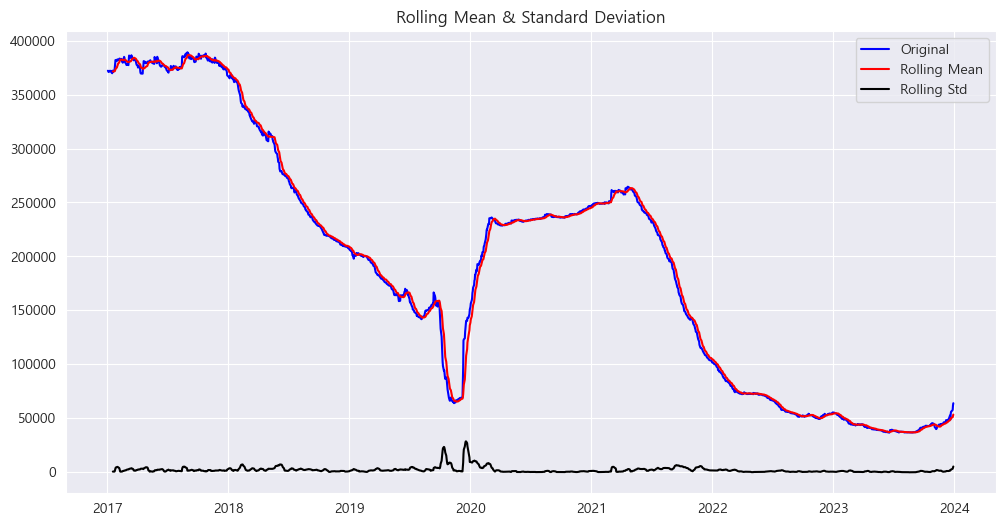

Results of Dickey-Fuller Test:
Test Statistic                   -1.636374
p-value                           0.464156
#Lags Used                       24.000000
Number of Observations Used    1742.000000
Critical Value (1%)              -3.434109
Critical Value (5%)              -2.863201
Critical Value (10%)             -2.567654
dtype: float64


In [57]:
stock_adf =  df_tmp.set_index('Í∏∞Ï§ÄÏùº')['Ïû¨Í≥†Îüâ']
check_stationarity(stock_adf)

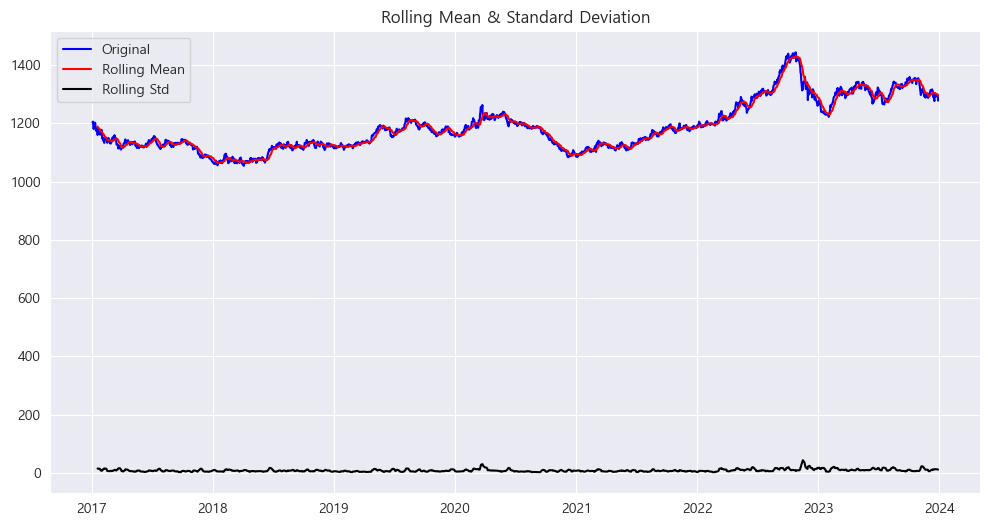

Results of Dickey-Fuller Test:
Test Statistic                   -1.271186
p-value                           0.642250
#Lags Used                        6.000000
Number of Observations Used    1760.000000
Critical Value (1%)              -3.434071
Critical Value (5%)              -2.863184
Critical Value (10%)             -2.567645
dtype: float64


In [58]:
er_adf =  df_tmp.set_index('Í∏∞Ï§ÄÏùº')['ÌôòÏú®']
check_stationarity(er_adf)

In [59]:
## p-valueÍ∞Ä 0.05Î≥¥ÌÉÄ ÌÅº => Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅ Í≥ºÏ†ïÏù¥ ÏïÑÎãê Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå
# Ï†ïÏÉÅÌôî Í≥ºÏ†ï ÌïÑÏöî

# 1Ï∞® Ï∞®Î∂Ñ ÏàòÌñâ
diff_data = df_tmp.diff().dropna()

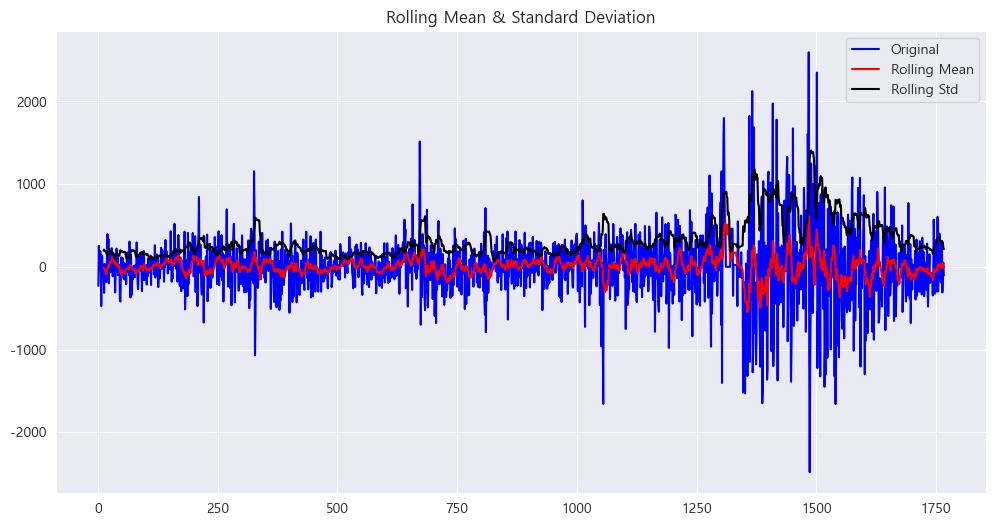

Results of Dickey-Fuller Test:
Test Statistic                -1.836863e+01
p-value                        2.220323e-30
#Lags Used                     4.000000e+00
Number of Observations Used    1.761000e+03
Critical Value (1%)           -3.434069e+00
Critical Value (5%)           -2.863183e+00
Critical Value (10%)          -2.567645e+00
dtype: float64


In [60]:
# Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Dickey-Fuller Í≤ÄÏ†ï ÏàòÌñâ
check_stationarity(diff_data['Í∏∞Ï§ÄÍ∞ÄÍ≤©'])

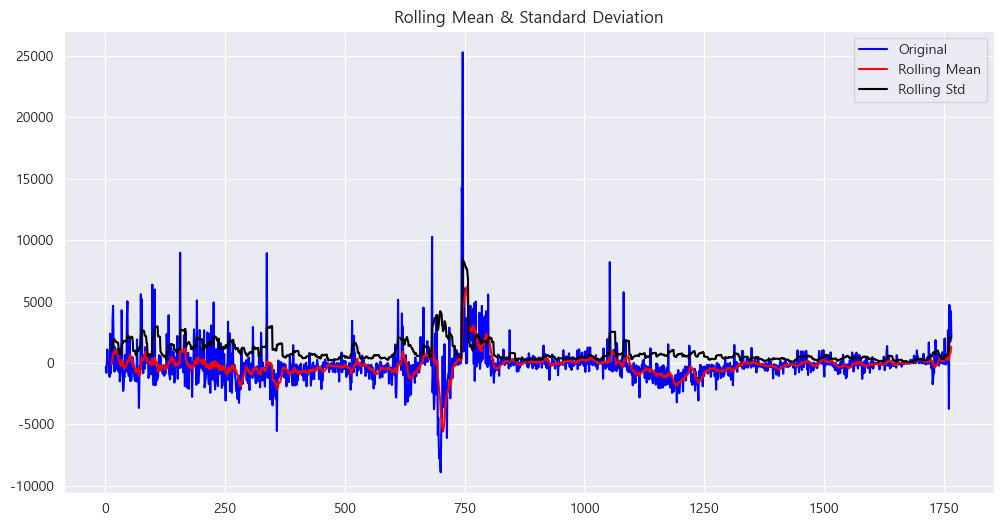

Results of Dickey-Fuller Test:
Test Statistic                   -5.530160
p-value                           0.000002
#Lags Used                       23.000000
Number of Observations Used    1742.000000
Critical Value (1%)              -3.434109
Critical Value (5%)              -2.863201
Critical Value (10%)             -2.567654
dtype: float64


In [61]:
check_stationarity(diff_data['Ïû¨Í≥†Îüâ'])

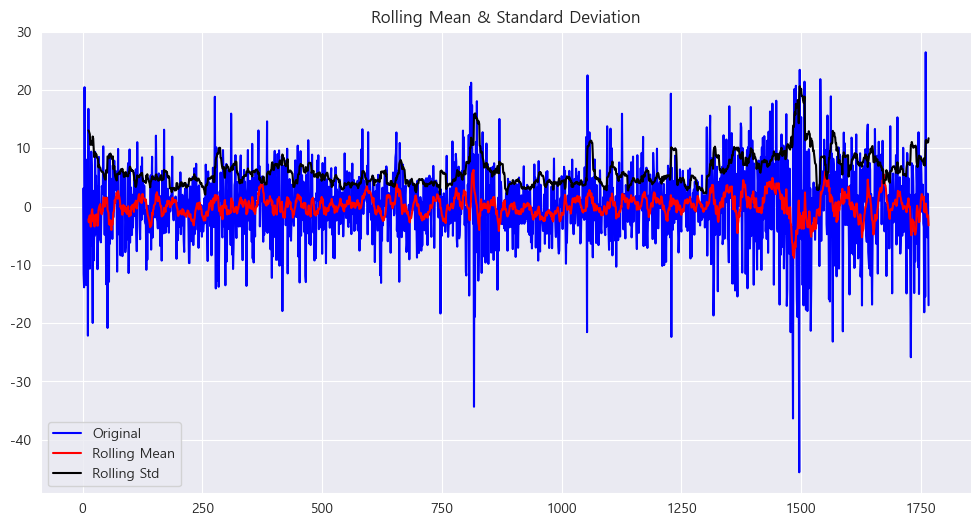

Results of Dickey-Fuller Test:
Test Statistic                -1.813004e+01
p-value                        2.507561e-30
#Lags Used                     5.000000e+00
Number of Observations Used    1.760000e+03
Critical Value (1%)           -3.434071e+00
Critical Value (5%)           -2.863184e+00
Critical Value (10%)          -2.567645e+00
dtype: float64


In [62]:
check_stationarity(diff_data['ÌôòÏú®'])

In [63]:
production_consumption

Í∏∞Ï§ÄÏùº       ÏÉùÏÇ∞Îüâ       ÏÜåÎπÑÎüâ
0 2017-12-31  2065.960  2090.518
1 2018-12-31  2251.992  2339.103
2 2019-12-31  2430.243  2430.139
3 2020-12-31  2528.167  2442.837
4 2021-12-31  2784.683  2962.181
5 2022-12-31  3089.143  3003.505
6 2023-12-31  3429.284  3171.547

Ïû¨Í≥†ÎüâÍ≥º ÏÉùÏÇ∞ÎüâÏùò Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïó∞ÎèÑÎ≥ÑÎ°ú Î∞ñÏóê ÏóÜÏñ¥ÏÑú ARIMA ÏÇ¨Ïö© x

In [64]:
df_tmp

Í∏∞Ï§ÄÏùº     Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ           ÌôòÏú®
0    2017-01-03  10205.0  372066  1202.930054
1    2017-01-04   9975.0  371724  1206.010010
2    2017-01-05  10230.0  370920  1194.479980
3    2017-01-06  10185.0  370920  1180.630005
4    2017-01-09  10245.0  372012  1201.099976
...         ...      ...     ...          ...
1762 2023-12-21  16670.0   53676  1296.979980
1763 2023-12-22  16360.0   56058  1291.709961
1764 2023-12-27  16355.0   57804  1293.920044
1765 2023-12-28  16405.0   62022  1294.760010
1766 2023-12-29  16300.0   64056  1277.839966

[1767 rows x 4 columns]

In [65]:
diff_data['ÎÇ†Ïßú'] = df_tmp['Í∏∞Ï§ÄÏùº'].copy()

In [66]:
diff_data

Í∏∞Ï§ÄÏùº   Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ         ÌôòÏú®         ÎÇ†Ïßú
1    1 days -230.0  -342.0   3.079956 2017-01-04
2    1 days  255.0  -804.0 -11.530030 2017-01-05
3    1 days  -45.0     0.0 -13.849975 2017-01-06
4    3 days   60.0  1092.0  20.469971 2017-01-09
5    1 days  190.0   -48.0   1.420044 2017-01-10
...     ...    ...     ...        ...        ...
1762 1 days  315.0  4722.0  -0.780030 2023-12-21
1763 1 days -310.0  2382.0  -5.270019 2023-12-22
1764 5 days   -5.0  1746.0   2.210083 2023-12-27
1765 1 days   50.0  4218.0   0.839966 2023-12-28
1766 1 days -105.0  2034.0 -16.920044 2023-12-29

[1766 rows x 5 columns]

#### ACF, PACF Í∑∏ÎûòÌîÑ

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

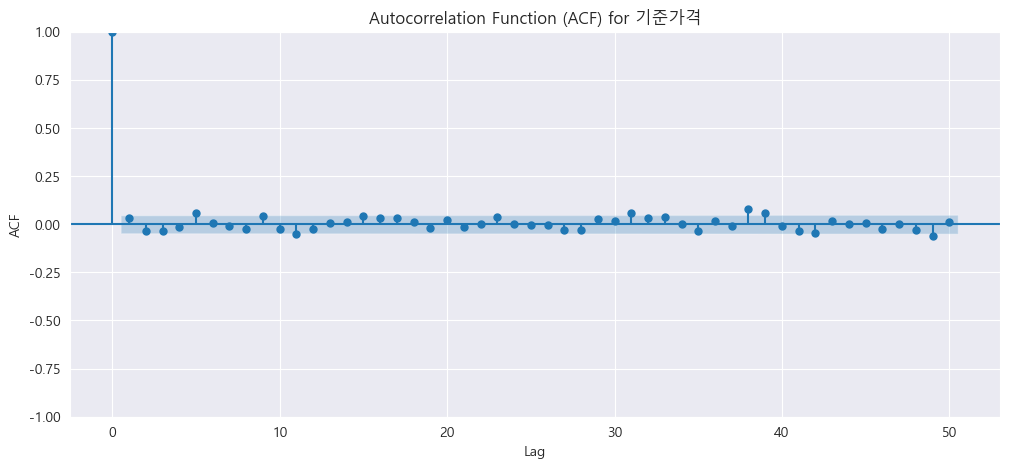

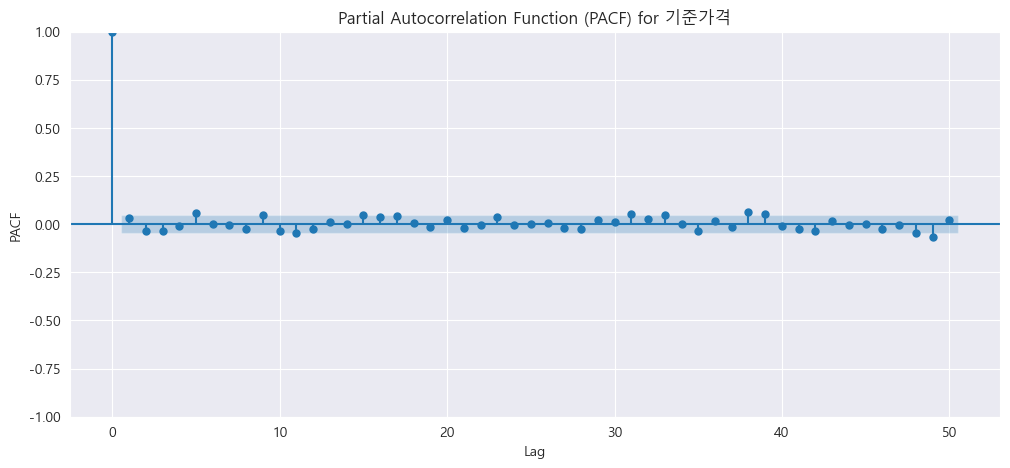

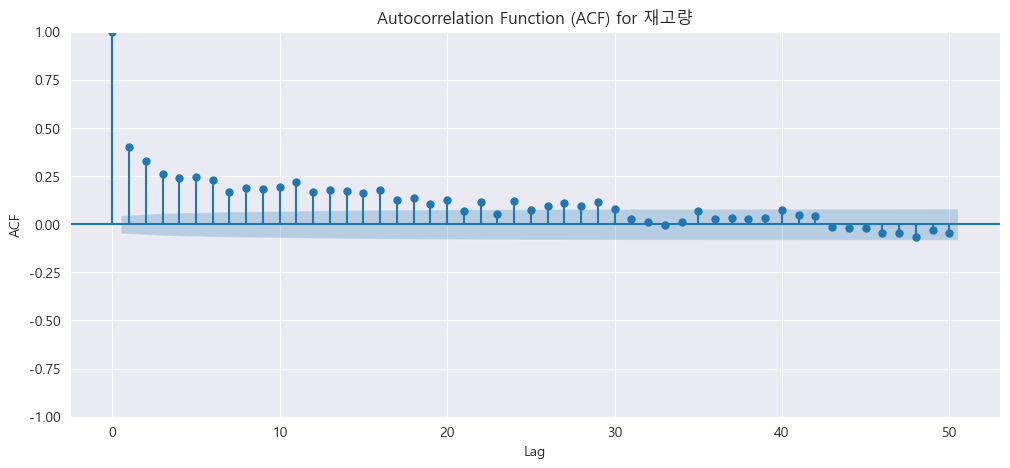

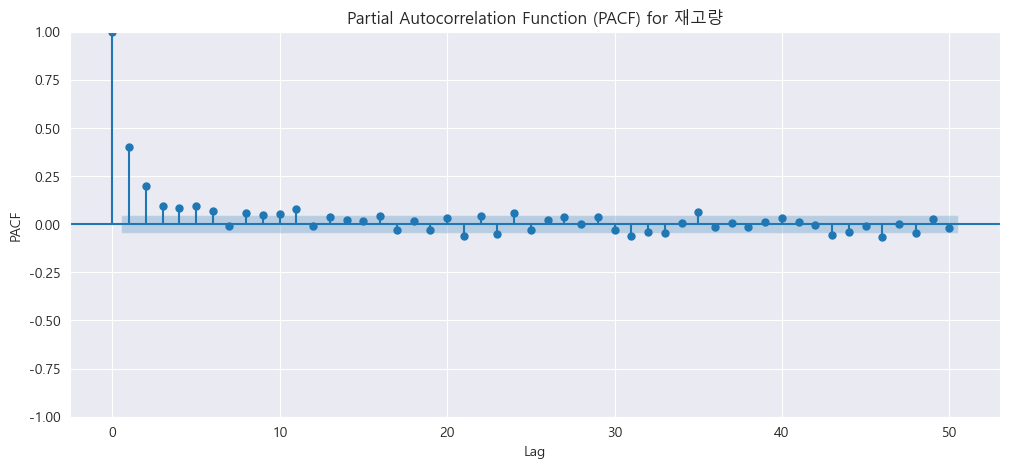

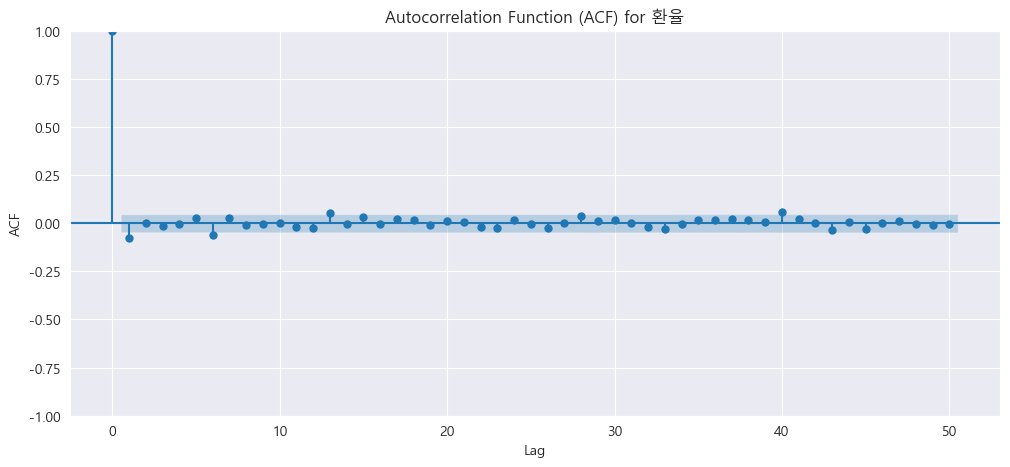

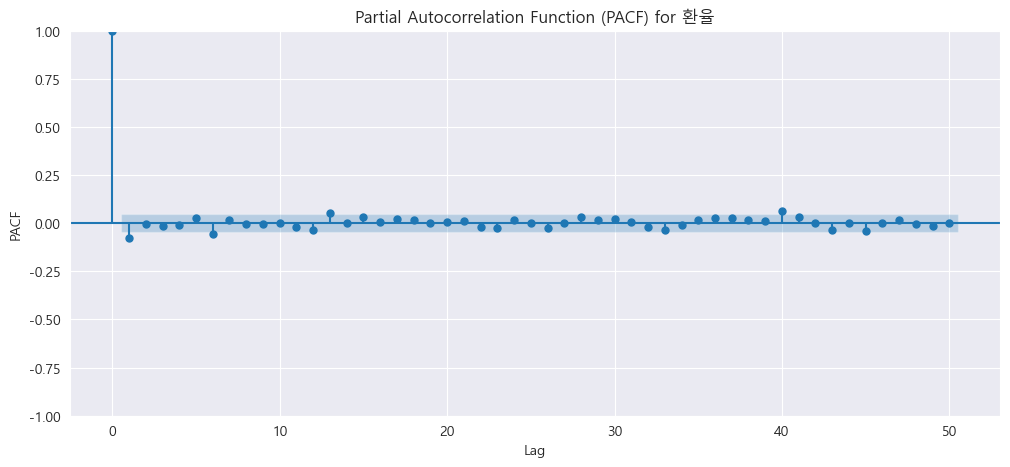

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ÎÇ†ÏßúÎ•º Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
arima_data = diff_data.set_index('ÎÇ†Ïßú')

# ACFÏôÄ PACF Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¥ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns = ['Í∏∞Ï§ÄÍ∞ÄÍ≤©', 'Ïû¨Í≥†Îüâ', 'ÌôòÏú®']

# Í∞Å Ïª¨ÎüºÏóê ÎåÄÌï¥ ACFÏôÄ PACF Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
for column in columns:
    data = arima_data[column]
    
    # ACF Í∑∏ÎûòÌîÑ
    fig, ax = plt.subplots(figsize=(12, 5))
    plot_acf(data, lags=50, ax=ax)  
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.title(f'Autocorrelation Function (ACF) for {column}')
    plt.show()
    
    # PACF Í∑∏ÎûòÌîÑ
    fig, ax = plt.subplots(figsize=(12, 5))
    plot_pacf(data, lags=50, ax=ax)  
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.title(f'Partial Autocorrelation Function (PACF) for {column}')
    plt.show()


#### Grid Search : best parameter Ï∞æÍ∏∞

In [69]:
import numpy as np
import itertools
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [70]:
def find_best_arima_params(data, p_range, d_range, q_range):

    best_aic = np.inf
    best_params = None
    
    # Generate all possible combinations of p, d, q
    pdq_combinations = list(itertools.product(p_range, d_range, q_range))
    
    # Iterate through all combinations
    for pdq in pdq_combinations:
        try:
            model = sm.tsa.ARIMA(data, order=pdq)
            results = model.fit()
            current_aic = results.aic
            
            # Save the best parameters
            if current_aic < best_aic:
                best_aic = current_aic
                best_params = pdq
        except:
            continue
    
    print(f"Best ARIMA parameters: {best_params} | AIC: {best_aic}")
    
    return best_params


In [71]:
from statsmodels.tsa.arima.model import ARIMA

def forecast_with_arima(data, column, order, periods):
    model = ARIMA(data[column], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=periods)
    return forecast

In [72]:
# Í∞ÄÍ≤© ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞
arima_data2 = df_tmp.set_index('Í∏∞Ï§ÄÏùº')
data=arima_data2['Í∏∞Ï§ÄÍ∞ÄÍ≤©'] 

# ÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
p_range = range(0, 3) # AR Ï∞®Ïàò Î≤îÏúÑ
d_range = range(0, 2) # Ï∞®Î∂Ñ Ï∞®Ïàò Î≤îÏúÑ
q_range = range(0, 3) # MA Ï∞®Ïàò Î≤îÏúÑ

# ÏµúÏ†ÅÏùò ARIMA Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞
best_params = find_best_arima_params(data, p_range, d_range, q_range)


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

Best ARIMA parameters: (2, 1, 2) | AIC: 26093.041206354592


In [73]:
# AICÍ∞íÏù¥ ÏûëÏùÄ (p,d,q)=(2, 1, 2)Î°ú Í∞ÄÍ≤©ÏòàÏ∏°
arima_data2 = df_tmp.set_index('Í∏∞Ï§ÄÏùº')

arima_forecasts2 = pd.DataFrame()
arima_forecasts2['Í∏∞Ï§ÄÍ∞ÄÍ≤©'] = forecast_with_arima(arima_data2, 'Í∏∞Ï§ÄÍ∞ÄÍ≤©', (2,1,2), 365)

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


data = arima_data2['Í∏∞Ï§ÄÍ∞ÄÍ≤©']

# Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµ ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÎÇòÎàÑÍ∏∞
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ARIMA Î™®Îç∏ ÌïôÏäµ
model = ARIMA(train, order=(2,1,2))  # (p, d, q) Í∞íÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Ï°∞Ï†ï Í∞ÄÎä•
model_fit = model.fit()

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
forecast = model_fit.forecast(steps=len(test))


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

In [75]:
# ÎÇ†Ïßú Ïª¨Îüº ÎßåÎì§Ïñ¥Ï£ºÍ∏∞
arima_forecasts2['ds'] = prophet_forecasts_d['ds']

In [76]:
arima_forecasts2

Í∏∞Ï§ÄÍ∞ÄÍ≤©         ds
1767  16315.069741 2023-12-30
1768  16291.206326 2023-12-31
1769  16275.256132 2024-01-01
1770  16292.456779 2024-01-02
1771  16308.130890 2024-01-03
...            ...        ...
2127  16293.385669 2024-12-24
2128  16293.385669 2024-12-25
2129  16293.385669 2024-12-26
2130  16293.385669 2024-12-27
2131  16293.385669 2024-12-28

[365 rows x 2 columns]

In [77]:
# Ïû¨Í≥†Îüâ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞
arima_data2 = df_tmp.set_index('Í∏∞Ï§ÄÏùº')
data=arima_data2['Ïû¨Í≥†Îüâ']

# ÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
p_range = range(0, 3) # AR Ï∞®Ïàò Î≤îÏúÑ
d_range = range(0, 2) # Ï∞®Î∂Ñ Ï∞®Ïàò Î≤îÏúÑ
q_range = range(0, 3) # MA Ï∞®Ïàò Î≤îÏúÑ
 
# ÏµúÏ†ÅÏùò ARIMA Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞
best_params = find_best_arima_params(data, p_range, d_range, q_range)


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

Best ARIMA parameters: (2, 0, 2) | AIC: 30490.177771824216


In [78]:
# (p,d,q)=(2, 0, 2)Î°ú Ïû¨Í≥†Îüâ ÏòàÏ∏°
arima_forecasts2['Ïû¨Í≥†Îüâ'] = forecast_with_arima(arima_data2, 'Ïû¨Í≥†Îüâ', (2,0,2), 365)

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

In [79]:
# ÌôòÏú® ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞
arima_data2 = df_tmp.set_index('Í∏∞Ï§ÄÏùº')
data=arima_data2['ÌôòÏú®']

# ÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
p_range = range(0, 3) # AR Ï∞®Ïàò Î≤îÏúÑ
d_range = range(0, 2) # Ï∞®Î∂Ñ Ï∞®Ïàò Î≤îÏúÑ
q_range = range(0, 3) # MA Ï∞®Ïàò Î≤îÏúÑ

# ÏµúÏ†ÅÏùò ARIMA Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞
best_params = find_best_arima_params(data, p_range, d_range, q_range)


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

Best ARIMA parameters: (0, 1, 1) | AIC: 11729.46489042318


In [80]:
# (p,d,q)=(0, 1, 1)Î°ú ÌôòÏú®ÏòàÏ∏°
arima_forecasts2['ÌôòÏú®'] = forecast_with_arima(arima_data2, 'ÌôòÏú®', (0, 1, 1), 365)

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

In [81]:
arima_forecasts2 = arima_forecasts2[['ds','Í∏∞Ï§ÄÍ∞ÄÍ≤©','Ïû¨Í≥†Îüâ','ÌôòÏú®']]

In [82]:
arima_forecasts2

ds          Í∏∞Ï§ÄÍ∞ÄÍ≤©            Ïû¨Í≥†Îüâ           ÌôòÏú®
1767 2023-12-30  16315.069741   65592.161883  1279.096551
1768 2023-12-31  16291.206326   67046.471425  1279.096551
1769 2024-01-01  16275.256132   68439.862092  1279.096551
1770 2024-01-02  16292.456779   69775.455038  1279.096551
1771 2024-01-03  16308.130890   71056.209525  1279.096551
...         ...           ...            ...          ...
2127 2024-12-24  16293.385669  155197.934648  1279.096551
2128 2024-12-25  16293.385669  155305.901982  1279.096551
2129 2024-12-26  16293.385669  155413.566589  1279.096551
2130 2024-12-27  16293.385669  155520.929318  1279.096551
2131 2024-12-28  16293.385669  155627.991016  1279.096551

[365 rows x 4 columns]

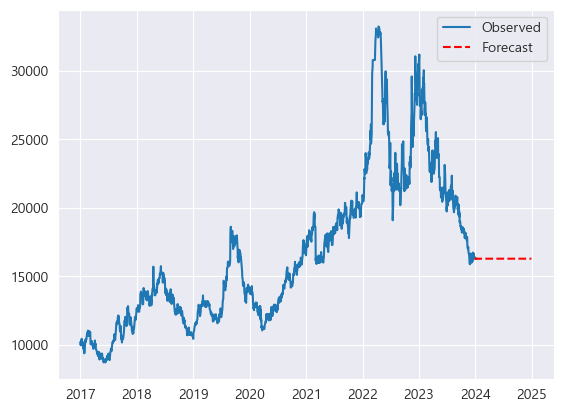

In [83]:
# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# ÎÇ†Ïßú(ds)Î•º Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
forecast_arima = arima_forecasts2.set_index('ds')
df = df_tmp.set_index('Í∏∞Ï§ÄÏùº')

plt.plot(df.index, df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Observed')
plt.plot(forecast_arima.index, forecast_arima['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Forecast', linestyle='--', color='r')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

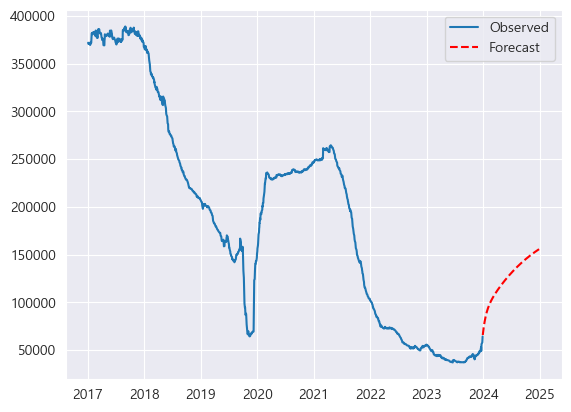

In [84]:
# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# ÎÇ†Ïßú(ds)Î•º Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
forecast_arima = arima_forecasts2.set_index('ds')
df = df_tmp.set_index('Í∏∞Ï§ÄÏùº')

plt.plot(df.index, df['Ïû¨Í≥†Îüâ'], label='Observed')
plt.plot(forecast_arima.index, forecast_arima['Ïû¨Í≥†Îüâ'], label='Forecast', linestyle='--', color='r')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

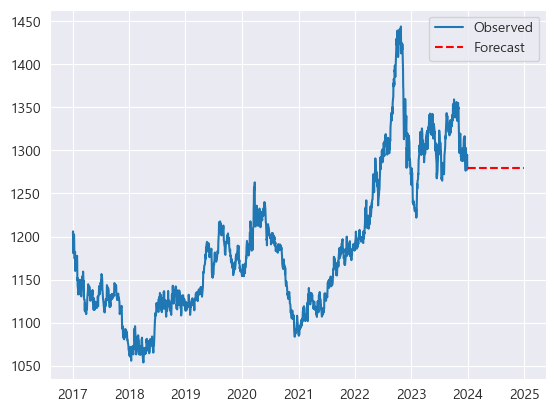

In [85]:
# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# ÎÇ†Ïßú(ds)Î•º Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
forecast_arima = arima_forecasts2.set_index('ds')
df = df_tmp.set_index('Í∏∞Ï§ÄÏùº')

plt.plot(df.index, df['ÌôòÏú®'], label='Observed')
plt.plot(forecast_arima.index, forecast_arima['ÌôòÏú®'], label='Forecast', linestyle='--', color='r')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

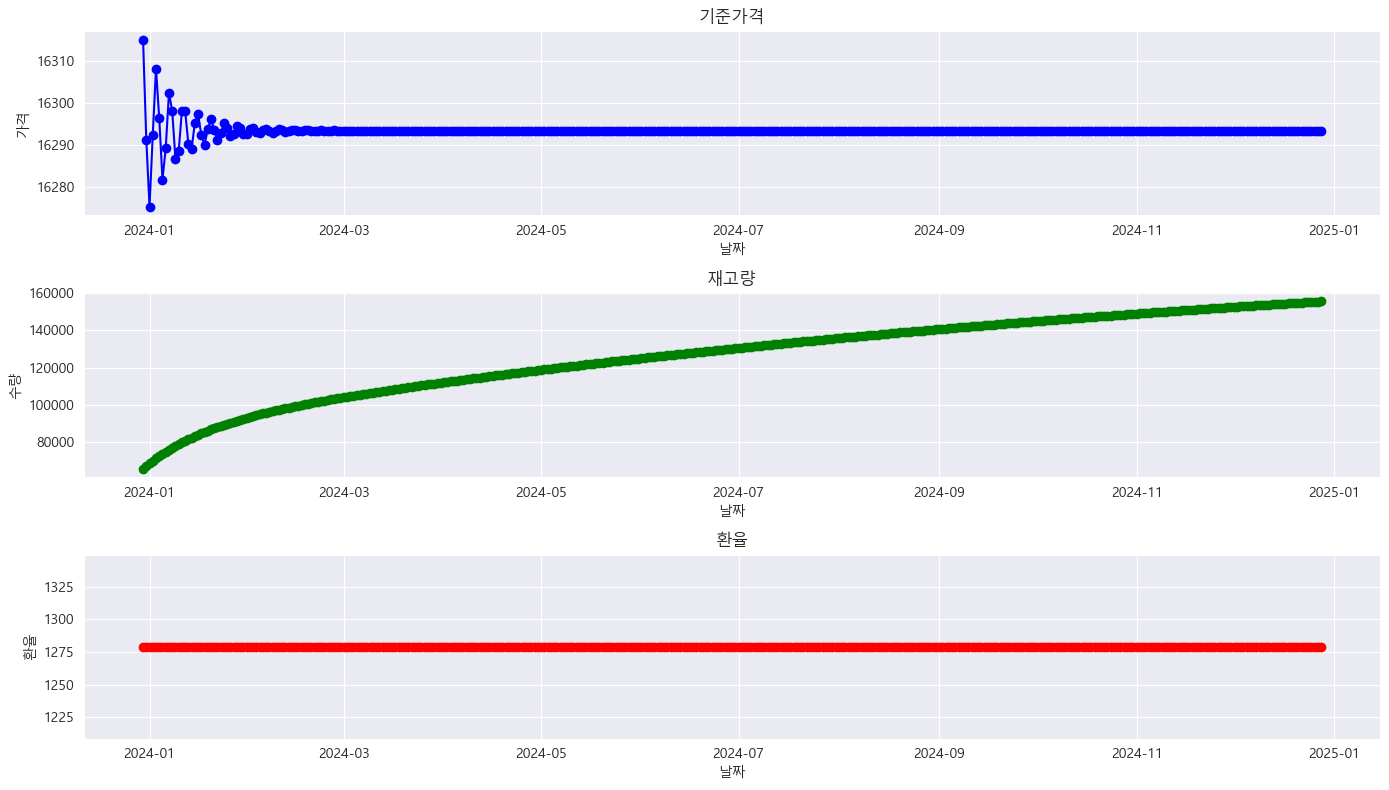

In [86]:
# ÎÇ†Ïßú(ds)Î•º Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
forecast_arima = arima_forecasts2.set_index('ds')

# ÎùºÏù∏ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(14, 8))

# Í∏∞Ï§ÄÍ∞ÄÍ≤© Í∑∏ÎûòÌîÑ
plt.subplot(3, 1, 1)  # 3Ìñâ 1Ïó¥ Ï§ë Ï≤´ Î≤àÏß∏
plt.plot(forecast_arima['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], marker='o', linestyle='-', color='b')
plt.title('Í∏∞Ï§ÄÍ∞ÄÍ≤©')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Í∞ÄÍ≤©')

# Ïû¨Í≥†Îüâ Í∑∏ÎûòÌîÑ
plt.subplot(3, 1, 2)  # 3Ìñâ 1Ïó¥ Ï§ë Îëê Î≤àÏß∏
plt.plot(forecast_arima['Ïû¨Í≥†Îüâ'], marker='o', linestyle='-', color='g')
plt.title('Ïû¨Í≥†Îüâ')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÏàòÎüâ')

# ÌôòÏú® Í∑∏ÎûòÌîÑ
plt.subplot(3, 1, 3)  # 3Ìñâ 1Ïó¥ Ï§ë ÏÑ∏ Î≤àÏß∏
plt.plot(forecast_arima['ÌôòÏú®'], marker='o', linestyle='-', color='r')
plt.title('ÌôòÏú®')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÌôòÏú®')

plt.tight_layout()
plt.show()

## prophetÍ≥º arima Î™®Îç∏ ÎπÑÍµê

In [103]:
model_evaluation = pd.DataFrame()

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

MAE: 2793.0577110874165
MSE: 12938129.878276723
RMSE: 3596.961200552033


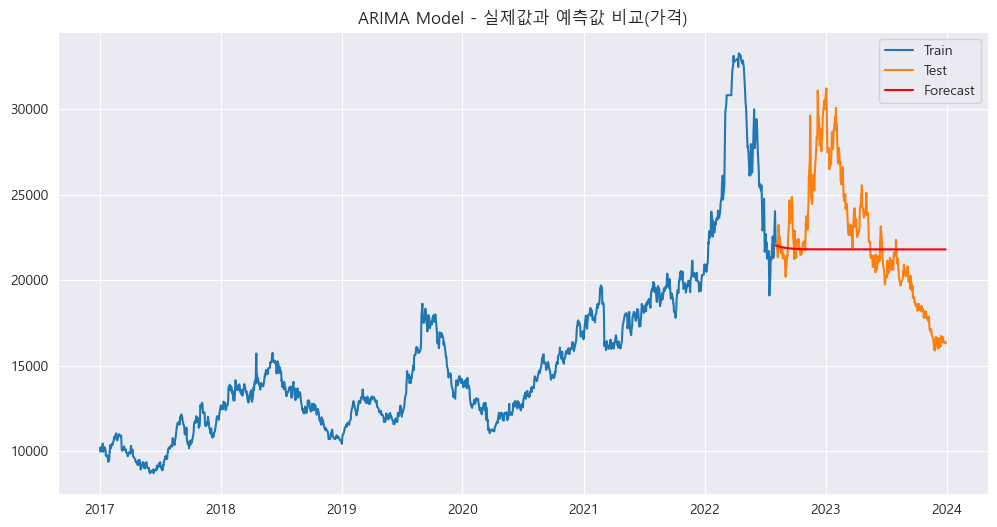

In [104]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Í∏∞Ï§ÄÍ∞ÄÍ≤© ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞
df = df_tmp.set_index('Í∏∞Ï§ÄÏùº')
price_series = df['Í∏∞Ï§ÄÍ∞ÄÍ≤©']

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (80% ÌõàÎ†®, 20% ÌÖåÏä§Ìä∏)
train_size = int(len(price_series) * 0.8)
train, test = price_series[:train_size], price_series[train_size:]

# ARIMA Î™®Îç∏ ÌïôÏäµ
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
forecast = model_fit.forecast(steps=len(test))

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ => Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
model_evaluation.loc['Í∏∞Ï§ÄÍ∞ÄÍ≤©', 'ARIMA'] = rmse

# Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Model - Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞í ÎπÑÍµê(Í∞ÄÍ≤©)')
plt.show()


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

MAE: 48554.888730496714
MSE: 3079610626.897418
RMSE: 55494.23958301815


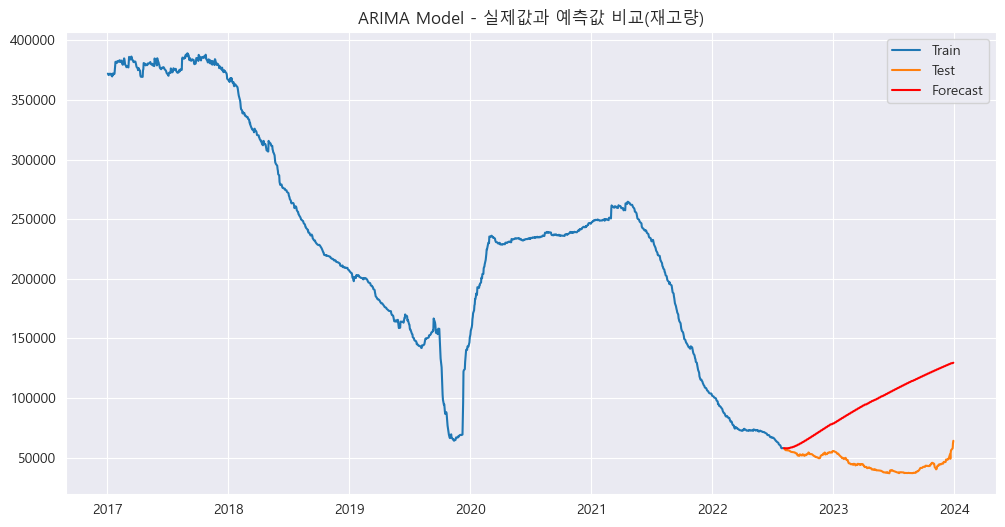

In [105]:

df = df_tmp.set_index('Í∏∞Ï§ÄÏùº')
stock = df['Ïû¨Í≥†Îüâ']

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (80% ÌõàÎ†®, 20% ÌÖåÏä§Ìä∏)
train_size = int(len(stock) * 0.8)
train, test = stock[:train_size], stock[train_size:]

# ARIMA Î™®Îç∏ ÌïôÏäµ
model = ARIMA(train, order=(2, 0, 2))
model_fit = model.fit()

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
forecast = model_fit.forecast(steps=len(test))

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ => Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
model_evaluation.loc['Ïû¨Í≥†Îüâ', 'ARIMA'] = rmse

# Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Model - Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞í ÎπÑÍµê(Ïû¨Í≥†Îüâ)')
plt.show()


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

MAE: 34.554254820941615
MSE: 2300.4512412365
RMSE: 47.96301951750432


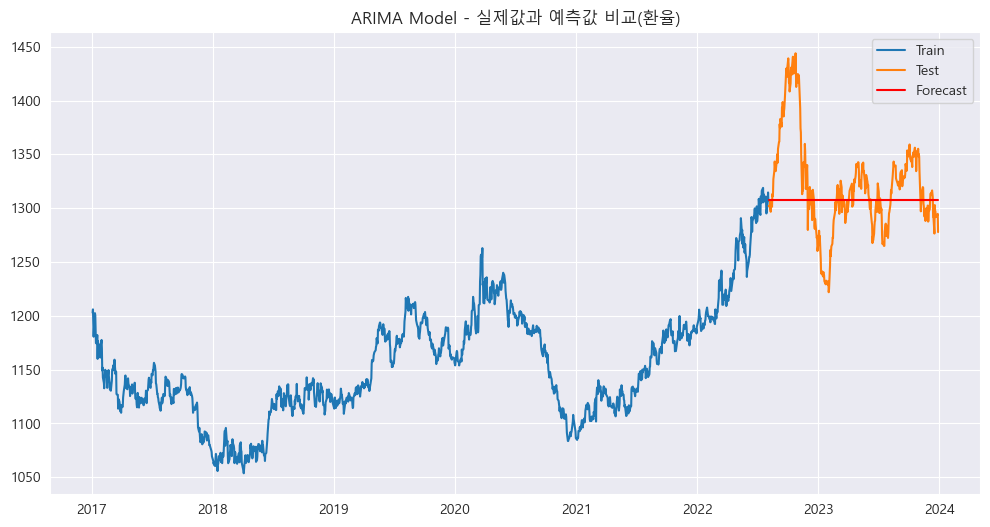

In [106]:

df = df_tmp.set_index('Í∏∞Ï§ÄÏùº')
exchangerate = df['ÌôòÏú®']

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (80% ÌõàÎ†®, 20% ÌÖåÏä§Ìä∏)
train_size = int(len(exchangerate) * 0.8)
train, test = exchangerate[:train_size], exchangerate[train_size:]

# ARIMA Î™®Îç∏ ÌïôÏäµ
model = ARIMA(train, order=(0, 1, 1))
model_fit = model.fit()

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
forecast = model_fit.forecast(steps=len(test))

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ => Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
model_evaluation.loc['ÌôòÏú®', 'ARIMA'] = rmse

# Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Model - Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞í ÎπÑÍµê(ÌôòÏú®)')
plt.show()


In [107]:
prophet_forecasts_d

ds          Í∏∞Ï§ÄÍ∞ÄÍ≤©           Ïû¨Í≥†Îüâ           ÌôòÏú®
1767 2023-12-30  19766.710989  34760.689296  1274.062553
1768 2023-12-31  19792.730179  34545.462898  1273.128813
1769 2024-01-01  18873.581438  42352.271907  1274.280779
1770 2024-01-02  18945.868807  42025.964637  1273.993306
1771 2024-01-03  18955.992419  41762.828598  1272.635558
...         ...           ...           ...          ...
2127 2024-12-24  13348.878120  30066.117189  1257.434703
2128 2024-12-25  13363.867843  29970.838824  1256.032993
2129 2024-12-26  13367.936857  29899.533876  1254.658793
2130 2024-12-27  13414.516547  29751.064269  1254.539940
2131 2024-12-28  14355.898325  21638.109657  1250.999674

[365 rows x 4 columns]

In [112]:
model_evaluation

ARIMA       Prophet
Í∏∞Ï§ÄÍ∞ÄÍ≤©   3596.961201   6652.346597
Ïû¨Í≥†Îüâ   55494.239583  18371.020729
ÌôòÏú®       47.963020     62.457881

## Î∂ÑÎ•òÎ™®Îç∏

In [113]:
# Ïù¥ÏßÑÎ∂ÑÎ•ò : (1 : Í≥µÍ∏âÏúÑÍ∏∞, 0 : ÏàòÍ∏âÏïàÏ†ï)
df_nickel['Í≥µÍ∏âÏúÑÍ∏∞']=[1. if s<=20 else 0. for s in df_nickel['ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò']]
df_nickel.head()

Í∏∞Ï§ÄÏùº      Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò           ÌôòÏú®     ÏÉùÏÇ∞Îüâ     ÏÜåÎπÑÎüâ  Í≥µÍ∏âÏúÑÍ∏∞
0 2017-01-01   9984.29  374047    76.63  1169.209961  172.16  174.21   0.0
1 2017-02-01  10619.50  381745    78.24  1133.939941  172.16  174.21   0.0
2 2017-03-01  10230.43  381883    74.56  1117.020020  172.16  174.21   0.0
3 2017-04-01   9668.61  375819    77.10  1135.640015  172.16  174.21   0.0
4 2017-05-01   9154.29  380589    80.06  1123.900024  172.16  174.21   0.0

### RANDOM FOREST

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [135]:
from sklearn.ensemble import RandomForestClassifier

# X: ÌäπÏÑ±(Feature), y: ÌÉÄÍ≤ü Î≥ÄÏàò(Target)
X = df_nickel.drop(['Í≥µÍ∏âÏúÑÍ∏∞','Í∏∞Ï§ÄÏùº','ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò'], axis=1)
y = df_nickel['Í≥µÍ∏âÏúÑÍ∏∞'] 

# Ìä∏Î†àÏù¥ÎãùÏÖãÍ≥º ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú ÎÇòÎàÑÍ∏∞
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Random Forest Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf_model = RandomForestClassifier(random_state=13)
rf_model.fit(X_train, y_train)

# Î™®Îç∏ ÌèâÍ∞Ä
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Confusion Matrix:
 [[10  1]
 [ 0  6]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.86      1.00      0.92         6

    accuracy                           0.94        17
   macro avg       0.93      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



In [136]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomForest Î∂ÑÎ•òÍ∏∞ ÏÉùÏÑ±
rf_model = RandomForestClassifier()

# GridSearchCVÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Best parameters found: ", grid_search.best_params_)

# ÏµúÏ†ÅÏùò Î™®Îç∏Î°ú ÏòàÏ∏° ÏàòÌñâ
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Í≤∞Í≥º ÌèâÍ∞Ä
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best parameters found:  {'bootstrap': True, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Confusion Matrix:
 [[9 2]
 [0 6]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        11
         1.0       0.75      1.00      0.86         6

    accuracy                           0.88        17
   macro avg       0.88      0.91      0.88        17
weighted avg       0.91      0.88      0.88        17



In [137]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# RandomForestClassifier Î™®Îç∏ Ï¥àÍ∏∞Ìôî
model = RandomForestClassifier(**grid_search.best_params_)

# ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ÑÎûµ Ï†ïÏùò (Ïó¨Í∏∞ÏÑúÎäî StratifiedKFoldÎ•º ÏÇ¨Ïö©)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

# ÍµêÏ∞® Í≤ÄÏ¶ù ÏàòÌñâ
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation ÌèâÍ∑† Ï†ïÌôïÎèÑ: {:.4f}".format(cv_scores.mean()))
print("Í∞Å FoldÏùò Ï†ïÌôïÎèÑ: {}".format(cv_scores))

# Í∞Å FoldÏóê ÎåÄÌïú confusion matrix Î∞è classification report Ï∂úÎ†•
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


Cross-validation ÌèâÍ∑† Ï†ïÌôïÎèÑ: 0.9404
Í∞Å FoldÏùò Ï†ïÌôïÎèÑ: [1.         0.88235294 1.         0.88235294 0.9375    ]

Confusion Matrix:
 [[12  0]
 [ 0  5]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Confusion Matrix:
 [[12  0]
 [ 2  3]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        12
         1.0       1.00      0.60      0.75         5

    accuracy                           0.88        17
   macro avg       0.93      0.80      0.84        17
weighted avg       0.90      0.88      0.87        17


Confusion Matrix:
 [[11  0]
 [ 0  6]]

Classification Report:
               precision    recal

In [138]:
# ÏòàÏ∏° Í≤∞Í≥ºÏôÄ Ïã§Ï†ú Î†àÏù¥Î∏îÏù¥ Îã§Î•∏ ÏÉòÌîåÎì§Ïùò Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
incorrect_indices = np.where(y_pred != y_test)[0]

# ÏûòÎ™ª Î∂ÑÎ•òÎêú ÏÉòÌîåÎì§Ïùò ÌäπÏÑ± Í∞í(X_test) ÌôïÏù∏
incorrect_samples = X_test.iloc[incorrect_indices]


In [139]:
incorrect_samples

Í∏∞Ï§ÄÍ∞ÄÍ≤©    Ïû¨Í≥†Îüâ           ÌôòÏú®     ÏÉùÏÇ∞Îüâ    ÏÜåÎπÑÎüâ
76  22229.5  39225  1319.790039  285.77  264.3

In [140]:
df_nickel[df_nickel['Ïû¨Í≥†Îüâ']==39225]

Í∏∞Ï§ÄÏùº     Í∏∞Ï§ÄÍ∞ÄÍ≤©    Ïû¨Í≥†Îüâ  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò           ÌôòÏú®     ÏÉùÏÇ∞Îüâ    ÏÜåÎπÑÎüâ  Í≥µÍ∏âÏúÑÍ∏∞
76 2023-05-01  22229.5  39225    18.54  1319.790039  285.77  264.3   1.0

### XGBoost

In [142]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# X: ÌäπÏÑ±(Feature), y: ÌÉÄÍ≤ü Î≥ÄÏàò(Target)
X = df_nickel.drop(['Í≥µÍ∏âÏúÑÍ∏∞','Í∏∞Ï§ÄÏùº','ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò'], axis=1)
y = df_nickel['Í≥µÍ∏âÏúÑÍ∏∞'] 

# Ìä∏Î†àÏù¥ÎãùÏÖãÍ≥º ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú ÎÇòÎàÑÍ∏∞

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# XGBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî
model = XGBClassifier()

# Î™®Îç∏ ÌõàÎ†®
model.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = model.predict(X_test)

# Î™®Îç∏ ÌèâÍ∞Ä
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[11  0]
 [ 0  6]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Accuracy Score: 1.0


In [143]:
# XGBoost Î™®Îç∏ Ï†ïÏùò
xgb_model = XGBClassifier()

# GridSearchCVÎ•º ÏúÑÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥ ÏÑ§Ï†ï
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# GridSearchCVÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Best parameters found: ", grid_search.best_params_)

# ÏµúÏ†ÅÏùò Î™®Îç∏Î°ú ÏòàÏ∏° ÏàòÌñâ
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# ÏµúÏ†ÅÏùò Î™®Îç∏ ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model: {:.4f}".format(accuracy))


Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Accuracy of the best model: 0.8235


In [144]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# XGBoost Î∂ÑÎ•òÍ∏∞ Ï¥àÍ∏∞Ìôî Î∞è ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©
best_xgb_model = XGBClassifier(**grid_search.best_params_)

# ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ÑÎûµ Ï†ïÏùò (StratifiedKFold ÏÇ¨Ïö©)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

# ÍµêÏ∞® Í≤ÄÏ¶ù ÏàòÌñâ
cv_scores = cross_val_score(best_xgb_model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation ÌèâÍ∑† Ï†ïÌôïÎèÑ: {:.4f}".format(cv_scores.mean()))
print("Í∞Å FoldÏùò Ï†ïÌôïÎèÑ: {}".format(cv_scores))

# Í∞Å FoldÏóê ÎåÄÌïú confusion matrix Î∞è classification report Ï∂úÎ†•
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_xgb_model.fit(X_train, y_train)
    y_pred = best_xgb_model.predict(X_test)

    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


Cross-validation ÌèâÍ∑† Ï†ïÌôïÎèÑ: 0.9287
Í∞Å FoldÏùò Ï†ïÌôïÎèÑ: [1.         0.88235294 0.94117647 0.88235294 0.9375    ]

Confusion Matrix:
 [[12  0]
 [ 0  5]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Confusion Matrix:
 [[12  0]
 [ 2  3]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        12
         1.0       1.00      0.60      0.75         5

    accuracy                           0.88        17
   macro avg       0.93      0.80      0.84        17
weighted avg       0.90      0.88      0.87        17


Confusion Matrix:
 [[10  1]
 [ 0  6]]

Classification Report:
               precision    recal

### LOGISTIC REGRESSION

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# X: ÌäπÏÑ±(Feature), y: ÌÉÄÍ≤ü Î≥ÄÏàò(Target)
X = df_nickel.drop(['Í≥µÍ∏âÏúÑÍ∏∞', 'Í∏∞Ï§ÄÏùº', 'ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò'], axis=1)
y = df_nickel['Í≥µÍ∏âÏúÑÍ∏∞'] 

# Ìä∏Î†àÏù¥ÎãùÏÖãÍ≥º ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú ÎÇòÎàÑÍ∏∞
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Logistic Regression Î™®Îç∏ Ï¥àÍ∏∞Ìôî
model = LogisticRegression(solver='liblinear')

# Î™®Îç∏ ÌõàÎ†®
model.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = model.predict(X_test)

# Î™®Îç∏ ÌèâÍ∞Ä
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[10  1]
 [ 0  6]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.86      1.00      0.92         6

    accuracy                           0.94        17
   macro avg       0.93      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17


Accuracy Score: 0.9411764705882353


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],  # Í∑úÏ†ú ÌååÎùºÎØ∏ÌÑ∞ CÏùò Í∞í
    'penalty': ['l1', 'l2'],       # Í∑úÏ†ú Ï¢ÖÎ•ò (L1, L2)
    'solver': ['liblinear']        # ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò (liblinearÎäî ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÅÌï©)
}

# Logistic Regression Î∂ÑÎ•òÍ∏∞ ÏÉùÏÑ±
lr_model = LogisticRegression(max_iter=1000)

# GridSearchCVÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Best parameters found: ", grid_search.best_params_)

# ÏµúÏ†ÅÏùò Î™®Îç∏Î°ú ÏòàÏ∏° ÏàòÌñâ
best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)

# Í≤∞Í≥º ÌèâÍ∞Ä
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Best parameters found:  {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Confusion Matrix:
 [[11  0]
 [ 0  6]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [151]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression Î∂ÑÎ•òÍ∏∞ Ï¥àÍ∏∞Ìôî Î∞è ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©
best_lr_model = LogisticRegression(**grid_search.best_params_,max_iter=1000)

# ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ÑÎûµ Ï†ïÏùò (StratifiedKFold ÏÇ¨Ïö©)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

# ÍµêÏ∞® Í≤ÄÏ¶ù ÏàòÌñâ
cv_scores = cross_val_score(best_lr_model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation ÌèâÍ∑† Ï†ïÌôïÎèÑ: {:.4f}".format(cv_scores.mean()))
print("Í∞Å FoldÏùò Ï†ïÌôïÎèÑ: {}".format(cv_scores))

# Í∞Å FoldÏóê ÎåÄÌïú confusion matrix Î∞è classification report Ï∂úÎ†•
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_lr_model.fit(X_train, y_train)
    y_pred = best_lr_model.predict(X_test)

    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


Cross-validation ÌèâÍ∑† Ï†ïÌôïÎèÑ: 0.9404
Í∞Å FoldÏùò Ï†ïÌôïÎèÑ: [1.         0.88235294 0.94117647 0.94117647 0.9375    ]

Confusion Matrix:
 [[12  0]
 [ 0  5]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Confusion Matrix:
 [[11  1]
 [ 1  4]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        12
         1.0       0.80      0.80      0.80         5

    accuracy                           0.88        17
   macro avg       0.86      0.86      0.86        17
weighted avg       0.88      0.88      0.88        17


Confusion Matrix:
 [[11  0]
 [ 0  6]]

Classification Report:
               precision    recal

## Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê

ÌèâÍ∑† Ï†ïÌôïÎèÑ ÎπÑÍµê

Random Forest: 0.9404

XGBoost: 0.9287

Logistic Regression: 0.9404

Random ForestÏôÄ Logistic RegressionÏù¥ ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Í≥† ÏûàÏúºÎ©∞, Î™®Îç∏Ïùò Ìï¥ÏÑù Í∞ÄÎä•ÏÑ±ÏùÑ Í≥†Î†§Ìï† Îïå Logistic RegressionÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ìï©Î¶¨Ï†ÅÏùº Ïàò ÏûàÏùå

## ÏòàÏ∏°Îç∞Ïù¥ÌÑ∞Î°ú Í≥µÍ∏âÏúÑÍ∏∞ ÌÉêÏßÄ(LOGISTIC REGRESSIONÏÇ¨Ïö©)

In [174]:
# ÏõîÎ≥Ñ ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌï¥ 'ds' Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïõî Ï†ïÎ≥¥ Ï∂îÏ∂úÌïòÏó¨ Îß§Ïõî 1ÏùºÎ°ú ÏÑ§Ï†ï
prophet_forecasts_d['Í∏∞Ï§ÄÏùº'] = prophet_forecasts_d['ds'].dt.to_period('M').dt.to_timestamp()

# ÏõîÎ≥ÑÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ Í∞Å ÏõîÏùò ÌèâÍ∑† Í≥ÑÏÇ∞
monthly_avg = prophet_forecasts_d.groupby('Í∏∞Ï§ÄÏùº').mean().reset_index()


In [175]:
monthly_avg.drop(columns='ds',inplace=True)

In [177]:
monthly_avg=monthly_avg[monthly_avg['Í∏∞Ï§ÄÏùº']>='2024-01-01']

In [180]:
monthly_avg

Í∏∞Ï§ÄÏùº          Í∏∞Ï§ÄÍ∞ÄÍ≤©           Ïû¨Í≥†Îüâ           ÌôòÏú®
1  2024-01-01  19296.850211  38137.867304  1266.476616
2  2024-02-01  19105.040851  34016.524930  1268.763599
3  2024-03-01  18482.031079  33087.555027  1277.336771
4  2024-04-01  18032.363447  31076.174786  1276.130677
5  2024-05-01  16518.254677  31344.292156  1284.106382
6  2024-06-01  15810.775993  26661.670987  1277.606724
7  2024-07-01  14873.909290  25130.035935  1286.000745
8  2024-08-01  15018.156389  25325.145569  1298.845520
9  2024-09-01  14799.441291  27148.266254  1310.586950
10 2024-10-01  13951.146957  22343.869873  1315.096807
11 2024-11-01  13626.947006  20800.932302  1283.785599
12 2024-12-01  13417.801716  25567.648025  1263.211039

In [181]:
prophet_forecasts_y

ds          ÏÉùÏÇ∞Îüâ          ÏÜåÎπÑÎüâ
7 2024-12-31  3648.794281  3249.542706
8 2025-12-31  3917.901521  3568.176923
9 2026-12-31  4222.362699  3789.673982

In [201]:
# 2024ÎÖÑ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
production_consumption_2024 = prophet_forecasts_y[prophet_forecasts_y['ds'].dt.year == 2024]

# ÏõîÎ≥ÑÎ°ú ÎÇòÎàà Í∞í Í≥ÑÏÇ∞
production_consumption_2024['ÏÉùÏÇ∞Îüâ'] = production_consumption_2024['ÏÉùÏÇ∞Îüâ'] / 12
production_consumption_2024['ÏÜåÎπÑÎüâ'] = production_consumption_2024['ÏÜåÎπÑÎüâ'] / 12



# 'ÏÉùÏÇ∞Îüâ'Í≥º 'ÏÜåÎπÑÎüâ' Ïó¥ Ï∂îÍ∞Ä
monthly_avg['ÏÉùÏÇ∞Îüâ'] = production_consumption_2024['ÏÉùÏÇ∞Îüâ'].values[0]
monthly_avg['ÏÜåÎπÑÎüâ'] = production_consumption_2024['ÏÜåÎπÑÎüâ'].values[0]


C:\Users\user\AppData\Local\Temp\ipykernel_30200\1287716795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_consumption_2024['ÏÉùÏÇ∞Îüâ'] = production_consumption_2024['ÏÉùÏÇ∞Îüâ'] / 12
C:\Users\user\AppData\Local\Temp\ipykernel_30200\1287716795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_consumption_2024['ÏÜåÎπÑÎüâ'] = production_consumption_2024['ÏÜåÎπÑÎüâ'] / 12
C:\Users\user\AppData\Local\Temp\ipykernel_30200\1287716795.py:11: SettingWithCopyWarning: 
A value is trying 

In [216]:
data_2024 = monthly_avg[monthly_avg.columns[[0,1,2,3,4,5]]]
data_2024.head()

Í∏∞Ï§ÄÏùº          Í∏∞Ï§ÄÍ∞ÄÍ≤©           Ïû¨Í≥†Îüâ           ÌôòÏú®        ÏÉùÏÇ∞Îüâ         ÏÜåÎπÑÎüâ
1 2024-01-01  19296.850211  38137.867304  1266.476616  304.06619  270.795226
2 2024-02-01  19105.040851  34016.524930  1268.763599  304.06619  270.795226
3 2024-03-01  18482.031079  33087.555027  1277.336771  304.06619  270.795226
4 2024-04-01  18032.363447  31076.174786  1276.130677  304.06619  270.795226
5 2024-05-01  16518.254677  31344.292156  1284.106382  304.06619  270.795226

In [217]:
df_nickel

Í∏∞Ï§ÄÏùº      Í∏∞Ï§ÄÍ∞ÄÍ≤©     Ïû¨Í≥†Îüâ  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò           ÌôòÏú®     ÏÉùÏÇ∞Îüâ     ÏÜåÎπÑÎüâ  Í≥µÍ∏âÏúÑÍ∏∞
0  2017-01-01   9984.29  374047    76.63  1169.209961  172.16  174.21   0.0
1  2017-02-01  10619.50  381745    78.24  1133.939941  172.16  174.21   0.0
2  2017-03-01  10230.43  381883    74.56  1117.020020  172.16  174.21   0.0
3  2017-04-01   9668.61  375819    77.10  1135.640015  172.16  174.21   0.0
4  2017-05-01   9154.29  380589    80.06  1123.900024  172.16  174.21   0.0
..        ...       ...     ...      ...          ...     ...     ...   ...
79 2023-08-01  20497.73   37074    28.00  1323.030029  285.77  264.30   0.0
80 2023-09-01  19629.05   39516    30.97  1351.930054  285.77  264.30   0.0
81 2023-10-01  18255.23   43572    31.98  1348.069946  285.77  264.30   0.0
82 2023-11-01  16979.77   43515    41.74  1288.359985  285.77  264.30   0.0
83 2023-12-01  16388.68   51172    47.40  1293.530029  285.77  264.30   0.0

[84 rows x 8 columns]

In [218]:

# X: ÌäπÏÑ±(Feature), y: ÌÉÄÍ≤ü Î≥ÄÏàò(Target)
X = df_nickel.drop(['Í≥µÍ∏âÏúÑÍ∏∞', 'Í∏∞Ï§ÄÏùº', 'ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò'], axis=1)
y = df_nickel['Í≥µÍ∏âÏúÑÍ∏∞'] 

# 2. Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©)

best_lr_model.fit(X, y)

# 3. 2024ÎÖÑ ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ Î°úÎìú
X_pred = data_2024.drop(['Í∏∞Ï§ÄÏùº'], axis=1)

# 4. 2024ÎÖÑ ÏòàÏ∏° ÏàòÌñâ
y_2024_pred = model.predict(X_pred)

# ÏòàÏ∏° Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
data_2024['Í≥µÍ∏âÏúÑÍ∏∞'] = y_2024_pred



In [219]:
data_2024

Í∏∞Ï§ÄÏùº          Í∏∞Ï§ÄÍ∞ÄÍ≤©           Ïû¨Í≥†Îüâ           ÌôòÏú®        ÏÉùÏÇ∞Îüâ         ÏÜåÎπÑÎüâ  \
1  2024-01-01  19296.850211  38137.867304  1266.476616  304.06619  270.795226   
2  2024-02-01  19105.040851  34016.524930  1268.763599  304.06619  270.795226   
3  2024-03-01  18482.031079  33087.555027  1277.336771  304.06619  270.795226   
4  2024-04-01  18032.363447  31076.174786  1276.130677  304.06619  270.795226   
5  2024-05-01  16518.254677  31344.292156  1284.106382  304.06619  270.795226   
6  2024-06-01  15810.775993  26661.670987  1277.606724  304.06619  270.795226   
7  2024-07-01  14873.909290  25130.035935  1286.000745  304.06619  270.795226   
8  2024-08-01  15018.156389  25325.145569  1298.845520  304.06619  270.795226   
9  2024-09-01  14799.441291  27148.266254  1310.586950  304.06619  270.795226   
10 2024-10-01  13951.146957  22343.869873  1315.096807  304.06619  270.795226   
11 2024-11-01  13626.947006  20800.932302  1283.785599  304.06619  270.795226   
12 2024-12-01  13417.801716  25567.648025  1263.211039  304.06619  270.795226   

    Í≥µÍ∏âÏúÑÍ∏∞  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
5    0.0  
6    0.0  
7    0.0  
8    0.0  
9    0.0  
10   0.0  
11   0.0  
12   0.0

üìå 2024ÎÖÑÏóêÎäî ÎãàÏºà ÏàòÍ∏âÏïàÏ†ï ÏòàÏÉÅ